<a href="https://colab.research.google.com/github/Uzayisenga/new/blob/AddPDF/ANN_DNN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success" style= "text-align:center">
<h1> Deep Learning 😊 </h1>
</div>

<div class="alert alert-block alert-info" style= "text-align:center">
<h3> 1. Neural Network </h3>
</div>

Two main points will be developped in this section
- Explanations about the neural networks and the important points to know
- Explanations and implementation of the assignment (Scratch Neural Network)

<div class="alert alert-block alert-danger" style= "text-align:center">
<h5> Neural Networks - Explanations </h5>
</div>

[Definition - Wikipedia](https://en.wikipedia.org/wiki/Neural_network)

[Definition - IBM](https://www.ibm.com/cloud/learn/neural-networks)

[Definition - Investopedia](https://www.investopedia.com/terms/n/neuralnetwork.asp)

[Definition - Introducting Perceptrons](https://www.simplilearn.com/what-is-perceptron-tutorial)

## Perceptrons
In this part we are introducing perceptrons (single layered perceptrons and multi layered perceptrons) which are the most basical neural network architecture. But the most important to know, cause it's the the basis of all the other neural network architectures.

### Perceptron representation
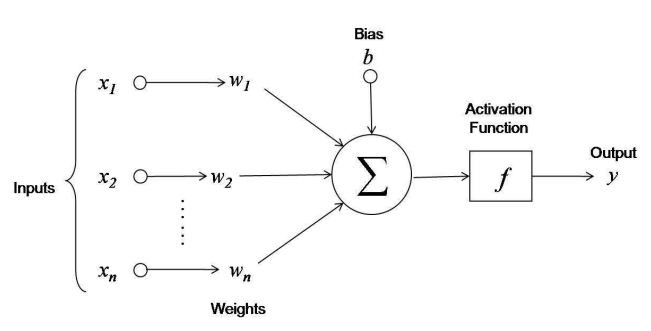

* **x1**, **x2**, ..., **xn** are the features of the data we feed in the perceptron
* **w1**, **w2**, ..., **wn** are the coefficients associated to those features. Actually all the learning part of machine learning / deep learning is about finding the right coefficients for good predictions (training)
* **b** is the bias, for now you can just consider as another coefficient like **wn** that helps the model to learn. For educational purpose I can choose to set it to zero.
* **epsilon** is a function that sums the products between the xs and the ws. **E = x1\*w1 + x2\*w2 + ... + xn\*wn + b**
* The activation function **f** is something we'll come back on more deeply later. But for now, you can just see it as a tool that helps the model better fit the data by adding non-linearity. One of the properties of the activation function is it's always non-linear.
* The output **y** is the result of all the calculations. **y = f(E)**

### Activation Functions
In Neural networks, usually there is one more step: the activation function, often called **g**.

Indeed, without the activation function, the value of epsilon **E** have no boundaries: It could go up to ± infinity. 

Moreover, though less intuitive, activation functions add non-linearity to the algorithm: without activation function, only linearly separable problems can be solved ! I hope you remember what a linearly separable problem is ? 


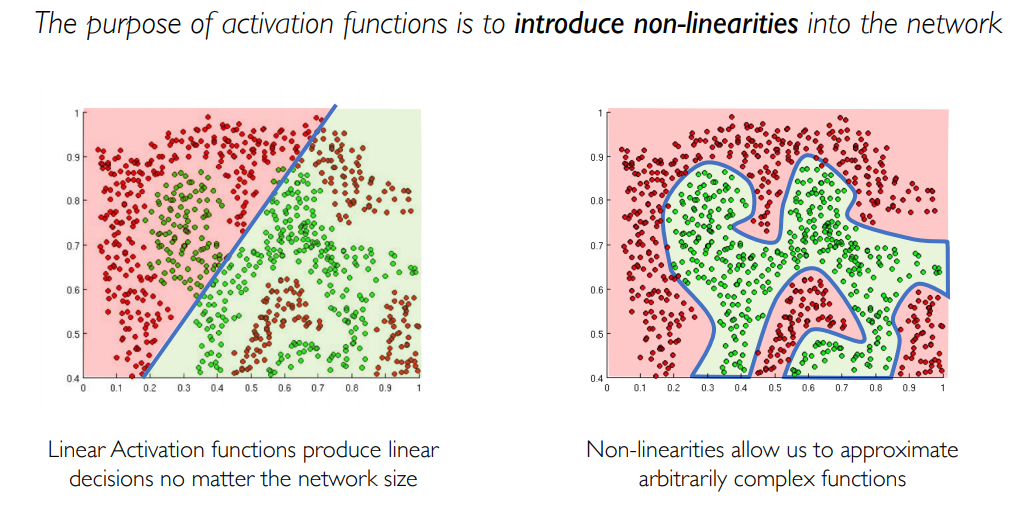



Let's see some very common activation functions.

* **Sigmoid** is a historic activation function, but not the most efficient in general, now used mainly in last layer of a binary classification. The formula is the following:

$$ sigmoid(x) = \frac{1}{1+e^{-x}} $$

* **Hyperbolic tangent (or tanh)** is quite similar to sigmoid function. The shape is close to the one of sigmoid, but ranges between -1 and 1, while sigmoid ranges between 0 and 1. This is has a symmetry that sigmoid does not.
This is not the most frequently used activation function at first approach anymore. The formula of tanh is the following:

$$
tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

* **Rectified linear unit (or relu)** is really different to sigmoid and tanh activations. Even though it looks odd at first sight, it has the advantage of avoiding the problem of vanishing gradient. It is currently one of the most widely used activation function. The formula is the following:

$$
relu(x) = max(0, x)
$$

Let's see what those functions look like !

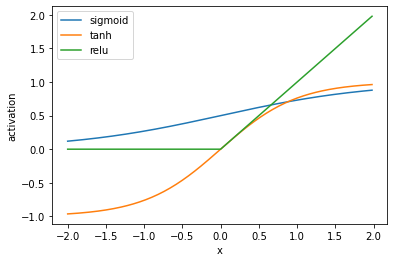

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 2, 0.02)

sigmoid = 1./(1+np.exp(-x))
tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
relu = np.max([np.zeros(len(x)), x], axis=0)

plt.plot(x, sigmoid)
plt.plot(x, tanh)
plt.plot(x, relu)

plt.xlabel('x')
plt.ylabel('activation')
plt.legend(['sigmoid', 'tanh', 'relu'])

plt.show()

Well... if you still understand then we're on the right path. This is basicaly the most difficult thing to grab about neural networks topology. Actually the Perceptron is nothing but a simple unit of a neural network. That means a neural is just a stack of layers of perceptrons and this why they are called **Multi Layered Perceptron - MLP** we'll talk about MLP just in a minute. 

But before that let's see how to build a simple Perceptron with sigmoid activation in TensorFlow 2. Le'go !

In [ ]:
# Import tensorflow
import tensorflow as tf

# Define a function
def perceptron(input_dim):
    # We create a so called Sequential model
    model = tf.keras.models.Sequential()
    
    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(1, input_dim=input_dim, activation='sigmoid'))

    # return the created model
    return model  

You will soon get familiar with the classes of TensorFlow/Keras. Here we are using the following:
- `Sequential()`: this will contain all the layers of our neural network
- `Dense(units, activation=None)`: this is a classical multi layer perceptron, taking as input the number of units (i.e. Neurons) and the activation function

> **NB:** the first layer of a `Sequential` model always takes as input the `input_dim`: this is the `shape` of your features! Otherwise TensorFlow does not know how many input features you have!

Finally, one can review a model with the `summary()` method:

In [ ]:
my_perceptron = perceptron(input_dim=5)

my_perceptron.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Congrats, you just built your very first Perceptron using Python and TensorFlow 2 / Keras. This wonderful, but ... sad news is actually our Perceptron is not fully working yet. What we have built so far, is just the architecture of the model, but we didn't add some very important components that allows the model to be trained and tested. But this is not a problem you should worry about yet, we'll come there. 

### Multi Layered Perceptrons

[Interesting Discussion](https://stats.stackexchange.com/questions/315402/multi-layer-perceptron-vs-deep-neural-network)

Neural networks are usually represented on diagrams using a standard convention:
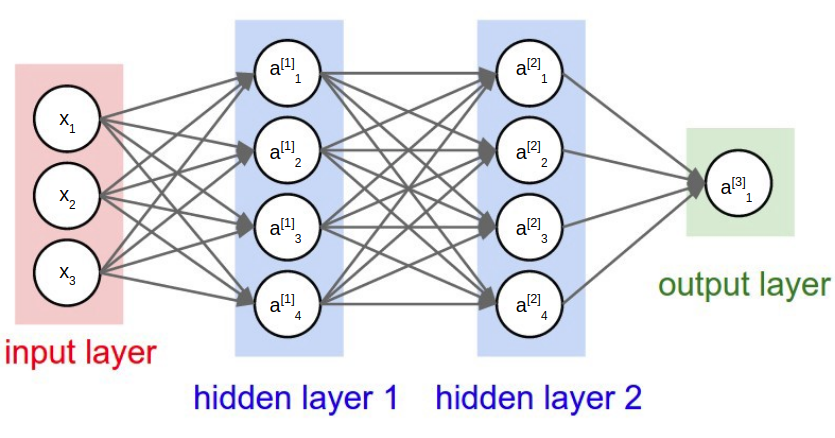



This diagram has to be read from left to right.

On the left, here in red, is the **input layer**: this is actually the input features $X=(x_1, x_2, x_3)$ (e.g. number of rooms in a house, presence of a garden...). The number of **units** is the number of input features.

On the right, in green, is the **output layer**: this is the prediction of target value (e.g. the house price in a regression, or the class in classification). The number of **units** depends on the task (for regression it is usually one, for multiclass classification the number of classes).

There is always one and only one input layer and output layer.

In the middle, in blue, are the **hidden layers**. There can be an arbitrary number of hidden layers. The hiddens layers also have an arbitrary number of **units**.

Let's change a little bit the code of our perceptron to turn into a multi layered perceptron (MLP)

In [ ]:
# Import tensorflow
import tensorflow as tf

# Define a function
def mlp(input_dim):
    # We create a so called Sequential model
    model = tf.keras.models.Sequential()
    
    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(3, input_dim=input_dim, activation='sigmoid'))
    
    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))

    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))

    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # return the created model
    return model 

In [ ]:
my_mlp = mlp(input_dim=5)

my_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


### The Feed Forward Algorithm (FFA)
Now that we understand the representation of a perceptron and a multi layered perceptron, we would understand how to compute the output predicted value, given input features $X = (x_1, x_2, ..., x_N)$.

To compute this output predicted value, we need to weights $W$ of each unit.

Each unit $i$ of a layer $l$ (except the input layer) has associated weights $W^{[l]}_i$. We will use those weights compute the activation $a^{[l]}_i$ of each unit.

Considering our example in diagram, we could compute the activations of the first hidden layer using the following formulas:

$$
a^{[1]}_{1} = g(W^{[1]}_{1} \times X + b^{[1]}_{1})
$$

$$
a^{[1]}_{2} = g(W^{[1]}_{2} \times X + b^{[1]}_{2})
$$

$$
a^{[1]}_{3} = g(W^{[1]}_{3} \times X + b^{[1]}_{3})
$$

$$
a^{[1]}_{4} = g(W^{[1]}_{4} \times X + b^{[1]}_{4})
$$

Where $b^{[1]}_{i}$ is called the bias, it is just an additional parameter, and g is the activation function

Now if we want to compute the activations of the second hidden layer $a^{[2]}_i$, we would use the exact same formulas, but with the activations of the first hidden layer as input ($a^{[1]}_i$), instead of the input features:

$$
a^{[2]}_{1} = g(W^{[2]}_{1} \times a^{[1]} + b^{[2]}_{1})
$$

$$
a^{[2]}_{2} = g(W^{[2]}_{2} \times a^{[1]} + b^{[2]}_{2})
$$

$$
a^{[2]}_{3} = g(W^{[2]}_{3} \times a^{[1]} + b^{[2]}_{3})
$$

$$
a^{[2]}_{4} = g(W^{[2]}_{4} \times a^{[1]} + b^{[2]}_{4})
$$

Finally, to compute the output layer would be exactly the same:
$$
a^{[3]}_{1} = g(W^{[3]}_{1} \times a^{[2]} + b^{[3]}_{1})
$$

So to summarize, the forward propagation is not so complicated, this is just multiplications and additions.

### Output Errors And Error Functions
We cannot calculate the perfect weights for a neural network; there are too many unknowns. Instead, the problem of learning is cast as a search or optimization problem and an algorithm is used to navigate the space of possible sets of weights the model may use in order to make good or good enough predictions.

Typically, a neural network model is trained using the stochastic gradient descent optimization algorithm and weights are updated using the backpropagation of error algorithm.

The “gradient” in gradient descent refers to an error gradient. The model with a given set of weights is used to make predictions and the error for those predictions is calculated.

The gradient descent algorithm seeks to change the weights so that the next evaluation reduces the error, meaning the optimization algorithm is navigating down the gradient (or slope) of error.

Now that we know that training neural nets solves an optimization problem, we can look at how the error of a given set of weights is calculated.

#### What Is a Loss Function and Loss?
In the context of an optimization algorithm, the function used to evaluate a candidate solution (i.e. a set of weights) is referred to as the objective function.

We may seek to maximize or minimize the objective function, meaning that we are searching for a candidate solution that has the highest or lowest score respectively.

Typically, with neural networks, we seek to minimize the error. As such, the objective function is often referred to as a cost function or a loss function and the value calculated by the loss function is referred to as simply “loss.”

The cost or loss function has an important job in that it must faithfully distill all aspects of the model down into a single number in such a way that improvements in that number are a sign of a better model.

In calculating the error of the model during the optimization process, a loss function must be chosen.

This can be a challenging problem as the function must capture the properties of the problem and be motivated by concerns that are important to the project and stakeholders.

Now that we are familiar with the loss function and loss, we need to know what functions to use.

#### Maximum Likelihood
There are many functions that could be used to estimate the error of a set of weights in a neural network.

We prefer a function where the space of candidate solutions maps onto a smooth (but high-dimensional) landscape that the optimization algorithm can reasonably navigate via iterative updates to the model weights.

Maximum likelihood estimation, or MLE, is a framework for inference for finding the best statistical estimates of parameters from historical training data: exactly what we are trying to do with the neural network.

We have a training dataset with one or more input variables and we require a model to estimate model weight parameters that best map examples of the inputs to the output or target variable.

Given input, the model is trying to make predictions that match the data distribution of the target variable. Under maximum likelihood, a loss function estimates how closely the distribution of predictions made by a model matches the distribution of target variables in the training data.

A benefit of using maximum likelihood as a framework for estimating the model parameters (weights) for neural networks and in machine learning in general is that as the number of examples in the training dataset is increased, the estimate of the model parameters improves. This is called the property of “consistency.”

Now that we are familiar with the general approach of maximum likelihood, we can look at the error function.

#### Maximum Likelihood and Cross-Entropy
Under the framework maximum likelihood, the error between two probability distributions is measured using cross-entropy.

When modeling a classification problem where we are interested in mapping input variables to a class label, we can model the problem as predicting the probability of an example belonging to each class. In a binary classification problem, there would be two classes, so we may predict the probability of the example belonging to the first class. In the case of multiple-class classification, we can predict a probability for the example belonging to each of the classes.

In the training dataset, the probability of an example belonging to a given class would be 1 or 0, as each sample in the training dataset is a known example from the domain. We know the answer.

Therefore, under maximum likelihood estimation, we would seek a set of model weights that minimize the difference between the model’s predicted probability distribution given the dataset and the distribution of probabilities in the training dataset. This is called the cross-entropy.

Technically, cross-entropy comes from the field of information theory and has the unit of “bits.” It is used to estimate the difference between an estimated and predicted probability distributions.

In the case of regression problems where a quantity is predicted, it is common to use the mean squared error (MSE) loss function instead.

Nevertheless, under the framework of maximum likelihood estimation and assuming a Gaussian distribution for the target variable, mean squared error can be considered the cross-entropy between the distribution of the model predictions and the distribution of the target variable.

Therefore, when using the framework of maximum likelihood estimation, we will implement a cross-entropy loss function, which often in practice means a cross-entropy loss function for classification problems and a mean squared error loss function for regression problems.

Almost universally, deep learning neural networks are trained under the framework of maximum likelihood using cross-entropy as the loss function.

In fact, adopting this framework may be considered a milestone in deep learning, as before being fully formalized, it was sometimes common for neural networks for classification to use a mean squared error loss function.

The maximum likelihood approach was adopted almost universally not just because of the theoretical framework, but primarily because of the results it produces. Specifically, neural networks for classification that use a sigmoid or softmax activation function in the output layer learn faster and more robustly using a cross-entropy loss function.

#### What Loss Function to Use?
We can summarize the previous section and directly suggest the loss functions that you should use under a framework of maximum likelihood.

Importantly, the choice of loss function is directly related to the activation function used in the output layer of your neural network. These two design elements are connected.

Think of the configuration of the output layer as a choice about the framing of your prediction problem, and the choice of the loss function as the way to calculate the error for a given framing of your problem.

We will review best practice or default values for each problem type with regard to the output layer and loss function.

* Regression Problem
A problem where you predict a real-value quantity.
    * Output Layer Configuration: One node with a linear activation unit.
    * Loss Function: Mean Squared Error (MSE).

* Binary Classification Problem
A problem where you classify an example as belonging to one of two classes. The problem is framed as predicting the likelihood of an example belonging to class one, e.g. the class that you assign the integer value 1, whereas the other class is assigned the value 0.
    * Output Layer Configuration: One node with a sigmoid activation unit.
    * Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

* Multi-Class Classification Problem
A problem where you classify an example as belonging to one of more than two classes. The problem is framed as predicting the likelihood of an example belonging to each class.

    * Output Layer Configuration: One node for each class using the softmax activation function.
    * Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

### Backpropagation and Gradient Descent Algorithms
Backpropagation and Gradient Descent are one of the tools used to train neural networks. The trainning process allows to let the neural network adjust it's weights **Ws** based on the errors made after each iteration. Gradient Descent allows to measure the rate of the error made and backpropagation allows to propagate that error through the network but from the end to the beginning, that's why it is called backpropagation.

#### Gradient Descent
This method is the key to minimizing the loss function and achieving our target, which is to predict close to the original value.

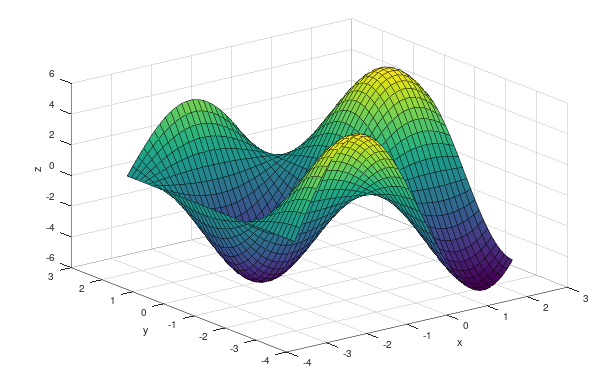

In this diagram, above we see our loss function graph. If we observe we will see it is basically a parabolic shape or a convex shape, it has a specific global minimum which we need to find in order to find the minimum loss function value.

So, we always try to use a loss function which is convex in shape in order to get a proper minimum.

Now, we see the predicted results depend on the weights from the feed forward formula. 

Initially, the model assigns random weights to the features. So, say it initializes the weight=a. 

So, we can see it generates a loss which is far from the minimum point L-min.

Now, we can see that if we move the weights more towards the positive x-axis we can optimize the loss function and achieve minimum value. 

But, how will the machine know? We need to optimize weight to minimize error, so, obviously, we need to check how the error varies with the weights.

To do this we need to find the derivative of the Error with respect to the weight. **This derivative is called Gradient.**

$$Gradient = dE/dw$$

Where $E$ is the error and $w$ is the weight.
Let’s see how this works.

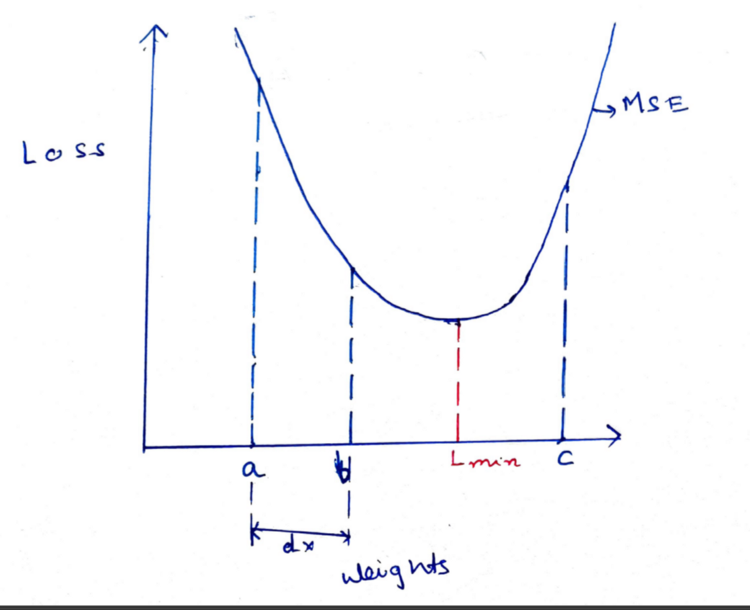

Say, if the loss increases with an increase in weight so Gradient will be positive, So we are basically at the point C, where we can see this statement is true.

If loss decreases with an increase in weight so gradient will be negative. We can see point A, corresponds to such a situation. 

Now, from point $A$ we need to move towards positive x-axis and the gradient is negative.

From point $C$, we need to move towards negative $x-axis$ but the gradient is positive.

So, always the negative of the Gradient shows the directions along which the weights should be moved in order to optimize the loss function. So, this way the gradient guides the model whether to increase or decrease weights in order to optimize the loss function.

The model found which way to move, now the model needs to find by how much it should move the weights. This is decided by a parameter called Learning Rate denoted by $Alpha$.

In the diagram we see, the weights are moved from point $A$ to point $B$ which are at a distance of $dx$.

$$dx=alpha*|dE/dw|$$

So, the distance to move is the product of learning rate parameter $alpha$ and the magnitude of change in error with a change in weight at that point.

Now, we need to decide the Learning Rate very carefully. If it is very large the values of weights will be changed with a great amount and it would overstep the optimal value. If it is very low it takes tiny steps and takes a lot of steps to optimize. The updated weights are changed according to the following formula.

$$w=w-alpha*|dE/dw|$$

where $w$ is the previous weight.

With each epoch, the model moves the weights according to the gradient to find the best weights.

Now, this is a loss optimization for a particular example in our training dataset. Our dataset contains thousands of such examples, so it will take a huge time to find optimal weights for all.

Experiments have shown that if we optimize on only one sample of our training set, the weight optimization is good enough for the whole dataset.

So, depending upon the methods we have different types of gradient descent mechanisms.

* **Stochastic Gradient Descent**: When we train the model to optimize the loss function using only one particular example from our dataset, it is called Stochastic Gradient Descent.

* **Batch Gradient Descent**: When we train the model to optimize the loss function using the mean of all the individual losses in our whole dataset, it is called Batch Gradient Descent.

* **Mini-Batch Gradient Descent**: Now, as we discussed batch gradient descent takes a lot of time and is therefore somewhat inefficient. If we look at SGD, it is trained using only 1 example. So, how good do you think a baby will learn if it is shown only one bike and told to learn about all other bikes? It's simple its decision will be somewhat biased to the peculiarities of the shown example. So, it is the same for the SGD, there is a possibility that the model may get too biased with the peculiarity of that particular example. So, we use the mean of a batch of 10–1000 examples to check the optimize the loss in order to deal with the problems.

#### Backpropagation
The minimum of the loss function of the neural network is not very easy to locate because it is not an easy function like the one we saw for MSE.

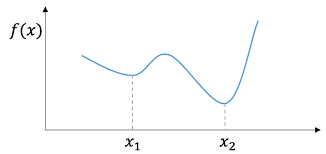


Now, as we see in the graph the loss function may look something like this. As we can see it has two minima, a local one and a global one. So, if we somehow end up in the local one we will end up in a suboptimal state. So, here the point where the weights initialize matters. For example, if the weights initialize to somewhere near $x1$ and there is a high chance we will get stuck at the local minima, which is not the same with normal MSE.

So, in neural nets the result Y-output is dependent on all the weights of all the edges. So, the error is obtained at the last output node and then we need to change w-12 and w-13 accordingly. So, we need to backpropagate the error all the way to the input node from the output node.

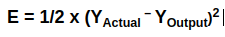

$W_{ij}$ is the weight of the edge from the output of the ith node to the input of the jth node. Now, here the $x$ is the input to every node. $y$ is the output from every node. Except for the input node, for all nodes,

$Y=F(X)$

Where F is the activation function.

For Input node

Now, we can see, the hidden layer nodes have a function $F1$ but in the output layer, it is $F2$. The $F1$ is usually $ReLU$ and $F2$ is usually a $Sigmoid$.

So for optimization of weights, we need to know the $dE /dW_{ij}$ for every W_{ij} in the network.

For this, we also need to, find the $dE/dX_i$ and $dE/dY_i$ for every node in the network.


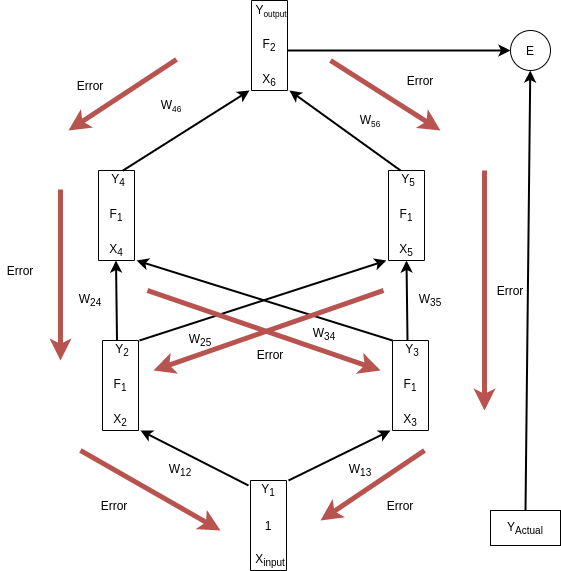

The error generated is backpropagated from the through the same nodes and the same edges through which forward propagation takes place and reaches from input edges from the output node.

#### Optimizers
Now we have seen the loss function has various local minima which can misguide our model. We can prevent this from happening if we can monitor and fix the learning rate properly.

Now, manually doing this is not possible, optimizers does this for us. It optimizes the learning rate automatically to prevent the model from entering a local minimum and is also responsible for fastening the optimization process.

Most used optimizers are:

* Adam
* Adagrad
* RMSProp
* SGD.

Adam is the most commonly used optimizer.

### Model Building
Now that we have learned all of this great things, let's practice and build our very first end-to-end model.

#### Classification Problem
We are going to use Python and TensorFlow along with Breast Cancer Dataset from the Scikit Learn librairy to build a MLP model that is able to predict a breast has cancer or not.

This is binary classification problem. You remember ? We talked about it previously.

##### Model architecture creation

In [ ]:
# Import tensorflow
import tensorflow as tf

# Define a function
def model(input_dim):
    # We create a so called Sequential model
    model = tf.keras.models.Sequential()
    
    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(3, input_dim=input_dim, activation='sigmoid'))
    
    # Add the second "Dense" layer of 3 units
    # This time the input dimension is not needed anymore: it is known from the previous layer
    model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

    # Add finally the output layer with one unit: the predicted result
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # return the created model
    return model  

In [ ]:
my_model = model(input_dim=5)
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


##### Model architecture compilation
Then you have to compile your model: indeed TensorFlow does not fully work on Python, so a compilation step is necessary. In the compilation, you can provide several parameters.
* The optimizer is the optimization algorithm: you already know the gradient descent, you can call it by using `optimizer='SGD`
* The loss function: for binary classification use `loss='binary_crossentropy'`, for regression use `loss='mean_squared_error'`
* You can also play with the metrics to display in real time, for example to display the accuracy, add the parameter `metrics=['accuracy']`

For more information, the documentation is [here](https://keras.io). 

In [ ]:
# Then you want to compile your model
# here with Gradient Descent and binary cross entropy (for binary classification)
my_model = model(input_dim=30)
my_model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

##### Model architecture training
Finally, you want to fit your model: just like in scikit-learn! For this example, we will use the *Wisconsin Breast Cancer* dataset from scikit-learn and then fit our model.

Again, some parameters have to be given:
* `x`: the input features
* `y`: the labels or target values
* `epochs`: the number of times you iterate over all the input samples
* `batch_size`: the number of samples used before updating the parameters of the model (we will speak more about it tomorrow)

In [ ]:
# First import and load the data
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

# Scale the input features
X=(X - X.mean(axis=0))/X.std(axis=0)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model, iterating on the data in batches of 32 samples
my_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
15/15 [==============================] - 1s 42ms/step - loss: 0.8045 - accuracy: 0.3633 - val_loss: 0.7633 - val_accuracy: 0.4123
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7795 - accuracy: 0.3697 - val_loss: 0.7454 - val_accuracy: 0.4123
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7604 - accuracy: 0.3666 - val_loss: 0.7305 - val_accuracy: 0.4123
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7448 - accuracy: 0.3577 - val_loss: 0.7192 - val_accuracy: 0.4123
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7381 - accuracy: 0.3277 - val_loss: 0.7098 - val_accuracy: 0.4123
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7208 - accuracy: 0.3471 - val_loss: 0.7017 - val_accuracy: 0.4123
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.3897 - val_loss: 0.6943 - val_accuracy: 0.4123
Epoch 8/10
15/15 [=

At the end, you can just predict values on a new sample using the usual *predict* method.

##### Model architecture evaluation
To predict, do not change your habits: use the function `.predict(X)`:

In [ ]:
# Predict for some values
my_model.predict(X_test[:5])

array([[0.5058758 ],
       [0.5193924 ],
       [0.52087957],
       [0.52133656],
       [0.52029973]], dtype=float32)

To evaluate, you can of course use scikit-learn's metrics as usual. But warning, the keras `.predict()` method does not return classes, but probabilities!

You can also use `.evaluate(X, y)`:
This function returns a list with the loss and the metrics.

In [ ]:
# Evaluate your model
loss, accuracy = my_model.evaluate(X_test, y_test)
print('loss is:', loss)
print('accuracy is:', accuracy)

4/4 [==============================] - 0s 864us/step - loss: 0.6800 - accuracy: 0.5877
loss is: 0.6800013780593872
accuracy is: 0.5877193212509155


#### Regression Problem
We will apply our knowledge to a use case we already know well: house price prediction on boston dataset.

This is a regression problem.

##### Data preparation

In [ ]:
# Import and load the dataset
from sklearn.datasets import load_boston

data = load_boston().data
target = load_boston().target
features = load_boston().feature_names

In [ ]:
# Have a peek on the data
import pandas as pd

X_df = pd.DataFrame(data=data, columns=features)
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Let's scale and split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_df = scaler.fit_transform(X_df)

X_train, X_test, y_train, y_test = train_test_split(X_df, target, test_size=0.2, random_state=0)

##### Model architecture creation
Now we want to build a Neural Network to perform this regression task. We will build a Neural Networks with 5 hidden layers of 100 units each.

In [ ]:
# Create the Sequential object
def model_five_layers(input_dim):

    model = tf.keras.models.Sequential()

    # Add the first Dense layers of 100 units with the input dimension
    model.add(tf.keras.layers.Dense(100, input_dim=input_dim, activation='sigmoid'))

    # Add four more layers of 100 units
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

    # Add finally the output layer with one unit: the predicted result
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    
    return model

##### Model architecture compilation

In [ ]:
model = model_five_layers(input_dim=X_train.shape[1])

# Compile the model with mean squared error (for regression)
model.compile(optimizer='SGD', loss='mean_squared_error')

##### Model architecture training

In [ ]:
# Now fit the model on 500 epoches with a batch size of 64
# You can add the test/validation set into the fit: it will give insights on this dataset too
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32)

Epoch 1/500
13/13 [==============================] - 0s 11ms/step - loss: 207.3669 - val_loss: 82.6835
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 82.8231 - val_loss: 87.1572
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 78.3963 - val_loss: 85.4212
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 96.5059 - val_loss: 81.5167
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 90.8883 - val_loss: 87.6246
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 91.2774 - val_loss: 83.0188
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 82.5334 - val_loss: 88.8410
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 99.3924 - val_loss: 81.4770
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 85.0727 - val_loss: 81.4766
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 80.6298 - val_l

### Model Regularization
Neural networks, as you know, are a really powerful tool. With a complex enough hierarchy, a neural network can learn almost anything. But the drawback is that they can overfit really easily.

Then, more than for any other model, regularization might be key to a good model.

Below is a plot of the loss of a neural network as a function of the number of epochs, trained on the MNIST digits dataset.

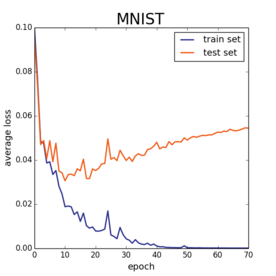

As one can see, on this example, after 10 epochs the model is actually overfitting and the test set loss does not decrease anymore. Even worse: the test loss increases!

> This means after 10 epochs the **performance** of the MLP is **decreasing**!

To overcome this situation, there are several ways: adding regularization, changing the number of layers/units, early stopping, dropout or even data augmentation.

#### Add Regularization

Regularization can be added at each layer just with a single parameter:

```
# Example of dense layer of 64 units with a regularization parameter set to 0.01
model.add(Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
```

However, sometimes you might not want to go directly onto this kind of regularization.


#### Layers and Units

Playing with layers and units is another way to add regularization. Indeed, overfitting is usually cause by a model too complex for the task. Thus, sometimes reducing the number of layers and units might decrease overfitting and then add regularization.

#### Early Stopping

As you can see in the already showed plot:

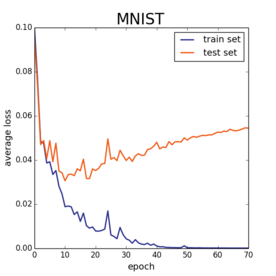

Overfitting usually does not happen during the first epochs. Then a method so called **early stopping** is to **stop training before the network overfits**.

Basically, in this example, a good early stopping would have been to stop around epoch 10.

However, TensorFlow allows to automatize that process, using the following callback method: 

```Python
tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
```

```
# Import the module
from keras.callbacks import EarlyStopping

# Instantiate a callback: here 5 epochs without improvement of the val_loss will stop training
callback = [EarlyStopping(monitor='val_loss', patience=5)]

# Then use it when you fit your model
model.fit(x = x,
          y = y,
          batch_size = BatchSize,
          epochs = epochs,
          validation_data=(x_text, y_test),
          callbacks = callback)
```

#### Dropout

A commonly used way of regularizing is the **dropout**. Dropout randomly sets some activation functions to 0 while fitting: this is equivalent to **randomly remove some units** of the neural network.

Why? Because it forces the network to not rely on some units only, but to use them all! Thus is may prevent from overfitting.

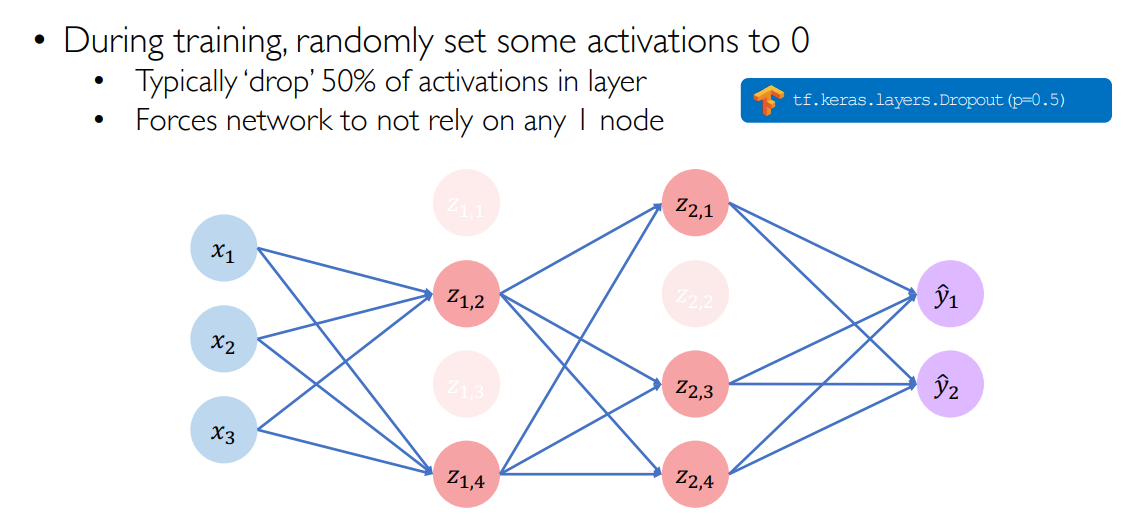

This can be used in TensorFlow adding a `Dropout` layer, with `p` specifying the probability (between 0 and 1) of a unit to be set to 0:
```Python
tf.keras.layers.Dropout(p=0.5)
```

<div class="alert alert-block alert-danger" style= "text-align:center">
<h5> Scratch Neural Network </h5>
</div>

### Problem 1 to 5

- Codes that determines the initial weigth value of each layer of the neural network
- Implementation of forward propagation 
- Implementation of cross entropy error
- Implementation of backpropagation

**MNIST** - This is a standard dataset for image classification and handwritten number recognition. This dataset contains 60,000 training and 10,000 test 28x28 pixel black and white images, and labels for which numbers are from 0 to 9.

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Keras** is an open-source software library that provides a Python interface for artificial neural networks. It acts as an interface for the TensorFlow library.

In [ ]:
print(X_train.shape) 
print(X_test.shape) 
print(X_train[0].dtype) 
print(X_train[0].shape)
print(type(X_train))

(60000, 28, 28)
(10000, 28, 28)
uint8
(28, 28)
<class 'numpy.ndarray'>


**Smoothing**

Each image of (1, 28, 28) is transformed into (1, 784). This is the form that we will use in the machine learning methods we have learned so far, and in the neural network we will use in here. The fact that all pixels are in a single row is described as flattened.


**Good to know**

So far in our study of machine learning, we have referred to the number of features as "dimensions". From that point of view, MNIST is 784 dimensions of data. On the other hand, the state that NumPy's shape is (784,) is also called 1D array. If the shape is (28, 28) which has information of height and width as an image, it is 2 dimensional array. From this point of view, it is two-dimensional data. If it is a colour image, then it is (28, 28, 3), which is a 3D array. From the previous point of view, it is a 3-dimensional data. However, from the point of view of a flat image, whether in black and white or colour, it is not three-dimensional data, it is two-dimensional data. Note that when dealing with image data, the word "dimension" is used in this way with multiple connotations.

In [ ]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

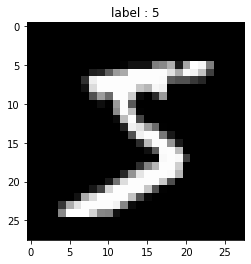

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

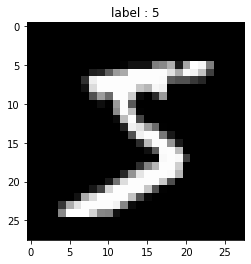

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [ ]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) 
image -= 105.35 
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image)

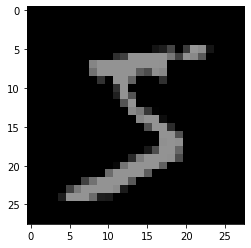

In [ ]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

**Preprocessing**

An image is represented by a uint8 type of 0 to 255, but in machine learning it will be handled as a float type of 0 to 1.

Also, the correct label is an integer between 0 and 9, which is converted to one-hot expression for multi-class classification in neural networks. scikit-learn's OneHotEncoder is used in the code below. The value in this one-hot representation is treated as a float because it indicates the probability of being that label. (**We will see this one later**)

In [ ]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) 
print(X_train.min())

1.0
0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

**Mini-batch Processing**

In the past (machine learning scratch),  all samples were computed at once. In neural networks, however, it is common to use Stochastic Gradient Descent, where the data is input in chunks. This is called a mini-batch and the number of samples is called the Batch size.


In this case, the batch size is set to 20. The training data we will use is 48000 pieces, so 48000 / 20 gives you 2400. In neural networks, this is called **2400 iterations**. Once all the training data has been viewed, one epoch has been completed. Repeating this epoch several times completes the learning process.


In [ ]:
class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

**Determining the initial weigth value**

In [ ]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 
n_output = 10
W1 = sigma * np.random.randn(n_features, n_nodes1)
n_nodes2 = 200
n_nodes3 = 10
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b1 = sigma * np.random.randn(n_nodes1)
b2 = sigma * np.random.randn(n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
b3 = sigma * np.random.randn(n_nodes3)
print("W1-->",W1.shape)
print("W2-->",W2.shape)
print("b1-->",b1.shape)
print("b2-->",b2.shape)
print("W3-->",W3.shape)
print("b3-->",b3.shape)

W1--> (784, 400)
W2--> (400, 200)
b1--> (400,)
b2--> (200,)
W3--> (200, 10)
b3--> (10,)


Defining the ScratchNeuralNetwork Class containing the **forward propagation**,  **cross entropy error** and **backpropagation**

In [ ]:
class ScratchSimpleNeuralNetworkClassifier():

    def __init__(self, verbose=False):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.01
        self.epoch = 10 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = []
        self.loss_test = []
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
        self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
        self.B3 = self.sigma * np.random.randn(1, self.n_output)
        
        for _ in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            for mini_X_train, mini_y_train in get_mini_batch:
                self.forward(mini_X_train)
                self.backward(mini_X_train, mini_y_train)
            self.forward(X)
            self.loss_train.append(self.cross_entropy_error(y, self.Z3))
            if X_val is not None:
                self.forward(X_val)
                self.loss_test.append(self.cross_entropy_error(y_val, self.Z3))

        if self.verbose:
            print(self.loss_train)
    
    def forward(self, X):
        self.A1 = X @ self.W1 + self.B1
        self.Z1 = self.tanh_function(self.A1)
        self.A2 = self.Z1 @ self.W2 + self.B2
        self.Z2 = self.tanh_function(self.A2)
        self.A3 = self.Z2 @ self.W3 + self.B3
        self.Z3 = self.softmax(self.A3)
    
    def backward(self, mini_X, mini_y):
        dA3 = self.Z3 - mini_y
        dB3 = np.sum(dA3, axis=0)
        dW3 = self.Z2.T @ dA3
        dZ2 = dA3 @ self.W3.T
        dA2 = dZ2 * (1 - self.tanh_function(self.A2)**2)
        dB2 = np.sum(dA2, axis=0)
        dW2 = self.Z1.T @ dA2
        dZ1 = dA2 @ self.W2.T
        dA1 = dZ1 * (1 - self.tanh_function(self.A1)**2)
        dB1 = np.sum(dA1, axis=0)
        dW1 = mini_X.T @ dA1
        self.W3 -= self.lr * dW3
        self.B3 -= self.lr * dB3
        self.W2 -= self.lr * dW2
        self.B2 -= self.lr * dB2
        self.W1 -= self.lr * dW1
        self.B1 -= self.lr * dB1
                
    def sigmoid_function(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh_function(self, A):
        return np.tanh(A)
    
    def softmax(self, A):
        return np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)

    def cross_entropy_error(self, y, Z):
        L = - np.sum(y * np.log(Z)) / len(y)
        return L
        
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z3, axis=1)

### Problem 6 - Learning and estimation

Training and estimating with the MNIST data and calculating the Accuracy.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_val[:, np.newaxis])

In [ ]:
NN = ScratchSimpleNeuralNetworkClassifier()
NN.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)
pred_train = NN.predict(X_train)
pred_test = NN.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train)

0.9957291666666667

In [ ]:
accuracy_score(y_val, pred_test)

0.9749166666666667

### Problem 7 - Plot the Learning Curve

**Plotting the Learning Curve**

Checking the learning curve is important because neural networks are prone to overfitting. We need to be able to record the loss (cross entropy error) per epoch for the training and validation data.

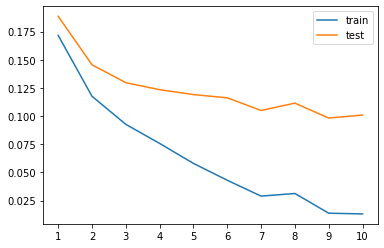

In [ ]:
plt.plot(list(range(1, NN.epoch+1)),NN.loss_train,  NN.label='train')
plt.plot(list(range(1, NN.epoch+1)), NN.loss_test, label='test')
plt.legend()
plt.xticks(list(range(1, NN.epoch+1)));

### Problem 8 - (Advance assignment) Confirmation of misclassification

Being able to see what the misclassified images look like.

```Python
"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".
Parameters:
----------
y_pred : Estimated ndarray (n_samples,)
y_val : Correct label of verification data (n_samples,)
X_val : Features of verification data（n_samples, n_features)
"""
```

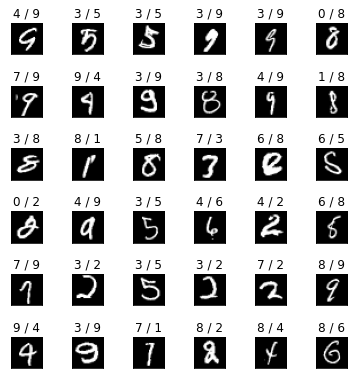

In [ ]:
y_pred = pred_test
import numpy as np
import matplotlib.pyplot as plt
num = 36
true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

<div class="alert alert-block alert-info" style= "text-align:center">
<h3> 2. Deep Neural Network </h3>
</div>

- Having more number of layers
- Being able to deal with advanced functions, activation functions, initial values and optimization methods
- **Will help you understand the coming frameworks**

### Problem 1 - Fully Connected Layers

The following modifications are needed

- Number of layers
- Layer type (other types of layers such as convolutional layers will appear in the future)
- Types of activation functions
- Weight and bias initialization method
- Optimization method

**The given sample codes (Sample codes 1, 2 and 3)**

The idea is to create an instance of the fully connected layer and activation function as in sample code 1, and use it as in sample code 2 and 3. Each class will be explained later.

- **Sample code 1** : In the fit method of ScratchDeepNeuralNetrowkClassifier

```Python
# self.sigma: Standard deviation of Gaussian distribution
# self.lr: Learning rate
# self.n_nodes1: Number of nodes in the first layer
# self.n_nodes2: Number of nodes in the second layer
# self.n_output: Number of nodes in the output layer

optimizer = SGD(self.lr)
self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
self.activation1 = Tanh()
self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
self.activation2 = Tanh()
self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
self.activation3 = Softmax()
```

- **Sample code 2** : Forward for each iteration

```Python
A1 = self.FC1.forward(X)
Z1 = self.activation1.forward(A1)
A2 = self.FC2.forward(Z1)
Z2 = self.activation2.forward(A2)
A3 = self.FC3.forward(Z2)
Z3 = self.activation3.forward(A3)
```

- **Sample code 3** : Backward for each iteration

```Python
dA3 = self.activation3.backward(Z3, Y) # The cross entropy error and softmax are matched.
dZ2 = self.FC3.backward(dA3)
dA2 = self.activation2.backward(dZ2)
dZ1 = self.FC2.backward(dA2)
dA1 = self.activation1.backward(dZ1)
dZ0 = self.FC1.backward(dA1) # dZ0 is not used
```

**Template for the Fully Connected Layers Class**

```Python
class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2
    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # Initialize
        # Initialize self.W and self.B using the initializer method
        pass
    def forward(self, X):
        """
        forward
        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """        
        pass
        return A
    def backward(self, dA):
        """
        Backward
        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward
        """
        pass
        # update
        self = self.optimizer.update(self)
        return dZ

```

**Implementation**

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
class FC:
    
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = initializer.B(self.n_nodes2)
        self.optimizer = optimizer
        self.HW = 0
        self.HB = 0
        
    def forward(self, X):
        self.Z = X
        self.A = X @ self.W + self.B
        return self.A
    
    def backward(self, dA):
        self.dB = np.sum(dA, axis=0)
        self.dW = self.Z.T @ dA
        self.dZ = dA @ self.W.T
        self = self.optimizer.update(self)
        return self.dZ

### Problem 2 - Initialization method

The idea is to be able to pass an instance of the initialization method to the constructor of the fully connected layer. The following template is given

```Python
class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution
    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer
        Returns
        ----------
        W :
        """
        pass
        return W
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer
        Returns
        ----------
        B :
        """
        pass
        return B


```

**Implementation of the Simple Intiializer Class which will be the the initialization method.**

In [ ]:
class SimpleInitializer:

    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

### Problem 3 - Optimization methods

Please classify the optimization method.


With respect to the optimization method, it is passed as an instance to the fully connected layer as well as the initialization method. When backward, we can update it as self.optimizer.update(self). 

The following template is given.

```Python
class SGD:
    """
    Stochastic gradient descent
    Parameters
    ----------
    lr : Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        Update weights and biases for a layer
        Parameters
        ----------
        layer : Instance of the layer before update
        """
```

The optimization methods we have dealt with so far are created as SGD class (Stochastic Gradient Descent). Check [this link](https://ruder.io/optimizing-gradient-descent/)

In [ ]:
class SGD:
    
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        layer.W -= self.lr * layer.dW / len(layer.Z)
        layer.B -= self.lr * layer.dB / len(layer.Z)
        return layer

### Problem 4 - Activation functions

Let's implement the activation function.


The backpropagation of the softmax function is simplified by implementing it including the calculation of the cross entropy error.

Let's implement **sigmoid, tanh** and **softmax**.

In [ ]:
class Sigmoid:

    def forward(self, A):
        self.A = A
        Z = 1 / (1 + np.exp(-self.A))
        return Z
    
    def backward(self, dZ):
        dA = dZ * ((1 / (1 + np.exp(-self.A))) - (1 / (1 + np.exp(-self.A)))**2)
        return dA

In [ ]:
class Tanh:

    def forward(self, A):
        self.A = A
        Z = np.tanh(self.A)
        return Z
    
    def backward(self, dZ):
        dA = dZ * (1 - np.tanh(self.A)**2)
        return dA

In [ ]:
class softmax:

    def forward(self, A): 
        Z = np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
        return Z
        
    def backward(self, Z, y):
        dA = Z - y
        loss = - np.sum(y * np.log(Z)) / len(y)
        return dA, loss

--------------------

----------------------

### Problem 5 - Creation of the ReLU Class

Let's implement ReLU (Rectified Linear Unit) which is a commonly used activation function as ReLU class.

<center><img src="1.png" width='400px'></center>

On the other hand, the derivative of $f(x)$ with respect to $x$ for backpropagation is

<center><img src="2.png" width='400px'></center>

In [ ]:
class ReLU:

    def forward(self, A):
        self.A = A
        Z = np.maximum(0, A)
        return Z
    
    def backward(self, dZ):
        dA = dZ * np.where(self.A > 0, 1, 0)
        return dA

### Problem 6 - Initial value of weight

Please read [this article](https://www.machinecurve.com/index.php/2019/09/16/he-xavier-initialization-activation-functions-choose-wisely/)

So far, the initial values of weights and bias have been simply Gaussian distributions, and standard deviation has been treated as a hyperparameter. However, it is known what value it should be. For sigmoidal and hyperbolic tangent functions, the initial value of Xavier (or the initial value of Glorot) is used, and for ReLU the initial value of He.

Let's create XavierInitializer class and HeInitializer class.

- Initial value of Xavier

The standard deviation $\sigma$ at the initial value of Xavier is calculated by the following formula.

# $${\sigma}=\frac{1}{\sqrt{n}}$$

$n$: number of nodes in the previous layer

In [ ]:
class XavierInitializer:
    
    def __init__(self, sigma):
        _ = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.sigma = 1 / np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
        
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

- Initial value of He

The standard deviation $\sigma$ of the initial value of He is calculated by the following formula.

# $${\sigma}=\sqrt{\frac{2}{n}}$$

$n$: number of nodes in the previous layer

In [ ]:
class HeInitializer:

    def __init__(self, sigma):
        _ = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.sigma = np.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

### Problem 7 - Optimization Method

The most common method is to vary the learning rate in the learning process. Let's a class of AdaGrad which is the basic method.

**Check DIVER for the formulas**

In [ ]:
class AdaGrad:

    def __init__(self, lr):
        self.lr = lr 
    
    def update(self, layer):
        layer.HW += layer.dW * layer.dW
        layer.HB += layer.dB * layer.dB
        delta = 1e-7 
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.HW) + delta) / len(layer.Z)
        layer.B -= self.lr * layer.dB / (np.sqrt(layer.HB) + delta) / len(layer.Z)
        return layer

### Problem 8 - Class Completion

Let's complete the ScratchDeepNeuralNetrowkClassifier class that can be trained and estimated with any configuration.

In [ ]:
class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1] 
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [ ]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = [] 
        self.loss_val = [] 
        optimizer = self.optimizer(self.lr)
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation3 = softmax()
        
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                A1 = self.FC1.forward(mini_X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                #print(Z2.shape)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                dA3, loss = self.activation3.backward(Z3, mini_y) 
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) 

            if self.verbose:
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)            
                self.loss_train.append(self.activation3.backward(Z3, y)[1])
                
                if X_val is not None:
                    A1 = self.FC1.forward(X_val)
                    Z1 = self.activation1.forward(A1)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)            
                    self.loss_val.append(self.activation3.backward(Z3, y_val)[1])
    
    def predict(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return np.argmax(Z3, axis=1)

### Problem 9 - Learning and Estimation

Let's create several networks with **varying numbers of layers and activation functions**. Then, train and estimate the MNIST data and calculate the Accuracy.

In [ ]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_val[:, np.newaxis])

In [ ]:
SDNN = ScratchDeepNeuralNetrowkClassifier(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU) 

SDNN.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

In [ ]:
pred = SDNN.predict(X_val)
accuracy_score(y_val, pred)

0.9786666666666667

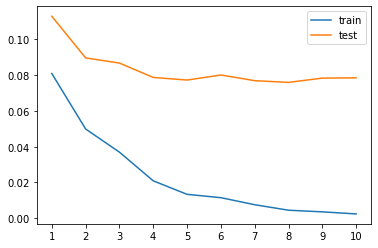

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_train, label='train')
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN.epoch+1)));

- Let's check the accuracy with other layers. We have tested with three layers, let's check for 4 and 6 layers.

In [ ]:
class ScratchDeepNeuralNetrowkClassifier_4():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_nodes3 = 150 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = [] 
        self.loss_val = []
        optimizer = self.optimizer(self.lr)

        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation4 = softmax()
        
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                self.forward(mini_X)
                self.backward(mini_y)
            
            if self.verbose:
                self.forward(X)
                self.loss_train.append(self.activation4.backward(self.Z4, y)[1])
                
                if X_val is not None:
                    self.forward(X_val)
                    self.loss_val.append(self.activation4.backward(self.Z4, y_val)[1])
    
    def forward(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC4.forward(Z3)
        self.Z4 = self.activation4.forward(A4)
        
    def backward(self, y):
        dA4, self.loss = self.activation4.backward(self.Z4, y) 
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) 
        
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z4, axis=1) 

In [ ]:
SDNN4 = ScratchDeepNeuralNetrowkClassifier_4(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN4.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

pred = SDNN4.predict(X_val)
accuracy_score(y_val, pred)

0.9784166666666667

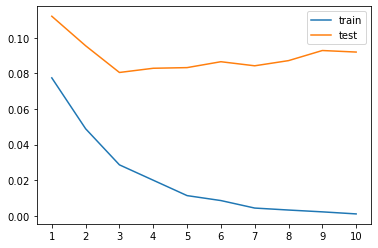

In [ ]:
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_train, label='train')
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN4.epoch+1)));

In [ ]:
class ScratchDeepNeuralNetrowkClassifier_6():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_nodes3 = 150 
        self.n_nodes4 = 100 
        self.n_nodes5 = 50 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = [] 
        self.loss_val = []
        optimizer = self.optimizer(self.lr)

        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_nodes4, self.initializer(self.sigma), optimizer)
        self.activation4 = self.activater()
        self.FC5 = FC(self.n_nodes4, self.n_nodes5, self.initializer(self.sigma), optimizer)
        self.activation5 = self.activater()
        self.FC6 = FC(self.n_nodes5, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation6 = softmax()
        
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                self.forward(mini_X)
                self.backward(mini_y)
            
            if self.verbose:
                self.forward(X)
                self.loss_train.append(self.activation6.backward(self.Z6, y)[1])
                
                if X_val is not None:
                    self.forward(X_val)
                    self.loss_val.append(self.activation6.backward(self.Z6, y_val)[1])
    
    def forward(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC4.forward(Z3)
        Z4 = self.activation4.forward(A4)
        A5 = self.FC5.forward(Z4)
        Z5 = self.activation5.forward(A5)
        A6 = self.FC6.forward(Z5)
        self.Z6 = self.activation6.forward(A6)
        
    def backward(self, y):
        dA6, self.loss = self.activation6.backward(self.Z6, y) 
        dZ5 = self.FC6.backward(dA6)
        dA5 = self.activation5.backward(dZ5)
        dZ4 = self.FC5.backward(dA5)
        dA4 = self.activation4.backward(dZ4)
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) 
        
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z6, axis=1)  

In [ ]:
SDNN6 = ScratchDeepNeuralNetrowkClassifier_6(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN6.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

pred = SDNN6.predict(X_val)
accuracy_score(y_val, pred)

0.9769166666666667

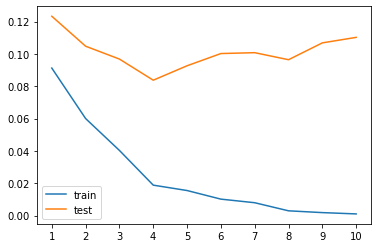

In [ ]:
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_train, label='train')
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN6.epoch+1)));

**In conclusion, we can say that the accuracy was at its best when we had three layers.**

Let's finally generalize the ScratchDeepNeuralNetrowkClassifier and make it possible to input layers with the number of nodes.

In [ ]:
class General_ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU, n_nodes=None):
        self.verbose = verbose
        self.batch_size = 20 
        self.sigma = 0.02
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
        self.n_nodes = n_nodes 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = [] 
        self.loss_val = [] 
        optimizer = self.optimizer(self.lr)
        self.fcs = [] 
        self.act = [] 
        
        for i in range(len(self.n_nodes)-2):
            self.fcs.append(FC(self.n_nodes[i], self.n_nodes[i+1], self.initializer(self.sigma), optimizer))
            self.act.append(self.activater())
        self.fcs.append(FC(self.n_nodes[i+1], self.n_nodes[-1], self.initializer(self.sigma), optimizer))
        self.act.append(softmax())

        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                A = []
                Z = []
                for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                    if i == 0:
                        A.append(f.forward(mini_X))
                        Z.append(a.forward(A[i]))
                    else:
                        A.append(f.forward(Z[i-1]))
                        Z.append(a.forward(A[i]))     
                dA = []
                dZ = []
                for i, (f, a) in enumerate(zip(self.fcs[::-1], self.act[::-1])):
                    if i == 0:
                        dA.append(a.backward(Z[-(i+1)], mini_y)[0])
                        dZ.append(f.backward(dA[i]))
                    else:
                        dA.append(a.backward(dZ[i-1]))
                        dZ.append(f.backward(dA[i]))

            if self.verbose:
                A = []
                Z = []
                for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                    if i == 0:
                        A.append(f.forward(X))
                        Z.append(a.forward(A[i]))
                    else:
                        A.append(f.forward(Z[i-1]))
                        Z.append(a.forward(A[i]))           
                self.loss_train.append(self.act[-1].backward(Z[-1], y)[1])
                
                if X_val is not None:
                    A = []
                    Z = []
                    for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                        if i == 0:
                            A.append(f.forward(X_val))
                            Z.append(a.forward(A[i]))
                        else:
                            A.append(f.forward(Z[i-1]))
                            Z.append(a.forward(A[i]))           
                    self.loss_val.append(self.act[-1].backward(Z[-1], y_val)[1])
    
    def predict(self, X):
        A = []
        Z = []
        for i, (f, a) in enumerate(zip(self.fcs, self.act)):
            if i == 0:
                A.append(f.forward(X))
                Z.append(a.forward(A[i]))
            else:
                A.append(f.forward(Z[i-1]))
                Z.append(a.forward(A[i]))
        return np.argmax(Z[-1], axis=1)

- Let's test it with 5 layers

In [ ]:
node_list = [784, 400, 200, 150, 100, 10]
SDNN5 = General_ScratchDeepNeuralNetrowkClassifier(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU, n_nodes=node_list)
SDNN5.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)
pred = SDNN5.predict(X_val)
accuracy_score(y_val, pred)

0.9778333333333333

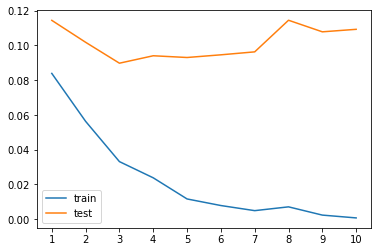

In [ ]:
plt.plot(list(range(1, SDNN5.epoch+1)), SDNN5.loss_train, label='train')
plt.plot(list(range(1, SDNN5.epoch+1)), SDNN5.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN5.epoch+1)));

<div class="alert alert-block alert-info" style= "text-align:center">
<h3> 3. Convolutional Neural Network (CNN) </h3>
</div>

Two main points will be developped in this section
- Explanations about the Convolutional Neural Network in general and the important points to know
- Explanations and implementation of the assignments (CNN1 and CNN2)

<div class="alert alert-block alert-danger" style= "text-align:center">
<h5> Explanations </h5>
</div>

### Definition

- A convolutional neural network is a feed-forward neural network that is generally used to analyze visual images by processing data with grid-like topology. It’s also known as a ConvNet. A convolutional neural network is used to detect and classify objects in an image.

- A convolutional neural network is a specific kind of neural network with multiple layers. It processes data that has a grid-like arrangement then extracts important features. One huge advantage of using CNNs is that you don't need to do a lot of pre-processing on images.

[Definition - freecodecamp](https://www.freecodecamp.org/news/convolutional-neural-network-tutorial-for-beginners/)

[Definition - edureka](https://www.edureka.co/blog/convolutional-neural-network/)

[Quick example using Tensorflow](https://www.tensorflow.org/tutorials/images/cnn)

[Definition - Datacamp](https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python)

### Why CNN ? 

**There are some disadvantages of using Artificial Neural Networks (ANN) for image classification**

1. Too much computation
2. Treats local pixels same as pixels far apart
3. Sensitive to location of an object in an image

<center><img src="33.png" width='600px'></center>

<center><img src="44.png" width='600px'></center>

<center><img src="55.png" width='600px'></center>

<center><img src="66.png" width='800px'></center>

### The idea

- <strong><font color='red'>Filters</font></strong>

<center><img src="77.png" width='800px'></center>

<center><img src="8.png" width='800px'></center>

-  <strong><font color='red'>Convolutional Operation</font></strong>

<center><img src="10.png" width='800px'></center>

If we take a **stride of 1**, we have the following (we are creating a **feature map***):

<center><img src="11.png" width='800px'></center>

Now, whenever we have **1** or a number that is close to 1, we have our loopy pattern (datecting a feature)

<center><img src="12.png" width='800px'></center>

<center><img src="13.png" width='800px'></center>

In summary, when we apply the given filter (Convolutional operation), we are generating a feature map that has that particular feature detector. Therefore, the following defines the **filters in CNN**:

<h3><center><font color="red"> Filters are nothing but the feature detectors</font></center></h1>

<center><img src="14.png" width='800px'></center>

**To come back to our number 9**

<center><img src="15.png" width='800px'></center>

<center><img src="16.png" width='800px'></center>

Koala's Head Dectector

<center><img src="17.png" width='800px'></center>

Koala's Detector 

<center><img src="18.png" width='800px'></center>

**Why do we need the fully connected  ?**

<center><img src="19.png" width='800px'></center>

In order to handle the variety in the inputs such that it can classify them in a generic way

-  <strong><font color='red'>ReLU Activation Function</font></strong>

<center><img src="20.png" width='800px'></center>

<h3><center><font color="red"> ReLU helps with making the model nonlinear</font></center></h1>

-  <strong><font color='red'>Pooling</font></strong>

**MaxPooling**

<center><img src="21.png" width='800px'></center>

Example

<center><img src="22.png" width='800px'></center>

**AveraPooling**

<center><img src="23.png" width='800px'></center>

Benefits of Pooling:

- **Reduces dimension and computation**
- **Reduces overfitting as there are less parameters**
- **Model is tolerant towards variations, distortions** (getting the main features and filtering all the noise)

### Full Architecture

<center><img src="24.png" width='800px'></center>

<center><img src="25.png" width='800px'></center>

### Layers in a Convolutional Neural Network (Resume)

A convolution neural network has multiple hidden layers that help in extracting information from an image. The four important layers in CNN are:

1. **Convolution layer**
    - This is the first step in the process of extracting valuable features from an image. A convolution layer has several filters that perform the convolution operation. Every image is considered as a matrix of pixel values.
    
2. **ReLU layer**
    - ReLU performs an element-wise operation and sets all the negative pixels to 0. It introduces non-linearity to the network, and the generated output is a rectified feature map.
3. **Pooling layer**
    - Pooling is a down-sampling operation that reduces the dimensionality of the feature map. The rectified feature map now goes through a pooling layer to generate a pooled feature map. The next step in the process is called flattening. Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector.
4. **Fully connected layer**
    - The flattened matrix is fed as input to the fully connected layer to classify the image.

### Benefits of the CNN

**Convolution**
- Connections sparsity reduces overfitting
- Conv + Pooling gives location invariant feature detection
- Parameter sharing

**ReLU**
- Introduces nonlinearity
- Speeds up training, faster to compute

**Pooling**

- Reduces dimension and computation
- Reduces overfitting as there are less parameters
- Model is tolerant towards variations, distorsions (getting the main features and filtering all the noise)

<div class="alert alert-block alert-danger" style= "text-align:center">
<h5> CNN 1 </h5>
</div>

### One-dimensional Convolutional Neural Network from Scratch

- Let's create the class Convolutional Neural Network (CNN) from scratch. We will implement the algorithm using only the minimum library such as NumPy.
- In this Sprint, we will build a 1D Convolutional layer and try to understand the basics of convolution. The next Sprint completes the CNN commonly used for images by creating a two-dimensional convolutional layer and a pooling layer.
- Name the class Scratch1dCNNClassifier. Please refer to the ScratchDeepNeuralNetrowkClassifier created in the previous Sprint for the class structure.
- We will continue to use the MNIST dataset for validation, with the 1D convolution taking a smoothed input as well as a fully connected neural network.



### Problem 1 - Creating a one-dimensional convolutional layer class that limits the number of channels to one

Create 1-dimensional convolutional layer class SimpleConv1d with the number of channels limited to 1. The basic structure will be the same as the FC class of the fully connected layer created in Sprint above. Recreate the class related to weight initialization if necessary. The point of using the initial value of Xavier is the same as the fully connected layer.


Here Padding ([Check this link](geeksforgeeks.org/cnn-introduction-to-padding/)) is not considered, and stride is also fixed to 1. Also, don't worry about processing multiple data at the same time, only support batch size 1. Extension of this part is an advanced task.


The formula for forward propagation is as follows

<center><img src="26.png" width='400px'></center>

$a_i$: The i-th value in the output array


$F$: Filter size


$x_{(i+s)}$: (i+s)th value in the input array


$w_s$: the sth value in the array of weights


$b$: Bias term

Next is the update formula. It is similar to the fully connected layer in that it is replaced with AdaGrad etc.

<center><img src="27.png" width='400px'></center>

$\alpha$: learning rate


$\frac{\partial L}{\partial w_s}$: slope of loss $L$ with respect to $w_s$ 


$\frac{\partial L}{\partial b}$: slope of loss $L$ with respect to $b$


Here is the backpropagation formula for the gradients $\frac{\partial L}{\partial w_s}$ and $\frac{\partial L}{\partial b}$.

<center><img src="28.png" width='400px'></center>

$\frac{\partial L}{\partial a_i}$: i-th value in the gradient array


$N_{out}$: Output size


The formula for the error to be passed to the previous layer is as follows

<center><img src="29.png" width='400px'></center>

$\frac{\partial L}{\partial x_j}$: jth value of the error array to be passed to the previous layer


However, when $js<0$ or $js>N_{out}-1$, $\frac{\partial L}{\partial a_{(js)}} =0$.

In [ ]:
class SimpleConv1d():

    def forward(self, x, w, b):
        a = []
        for i in range(len(w) - 1):
            a.append((x[i:i+len(w)] @ w) + b[0])
        return np.array(a)
    
    def backward(self, x, w, da):
        db = np.sum(da)
        dw = []
        for i in range(len(w)):
            dw.append(da @ x[i:i+len(da)])
        dw = np.array(dw)
        dx = []
        new_w = np.insert(w[::-1], 0, 0)
        new_w = np.append(new_w, 0)
        for i in range(len(new_w)-1):
            dx.append(new_w[i:i+len(da)] @ da)
        dx = np.array(dx[::-1])
        return db, dw, dx

### Problem 2 - Output size calculation after one-dimensional convolution

When the convolution is performed, the number of features will change. How it changes can be calculated from the following formula. It also includes padding and stride. Create a function to do this calculation.

<center><img src="30.png" width='400px'></center>

$N_{out}$: Output size (number of features)


$N_{in}$: Input size (number of features)


$P$: Number of paddings in one direction


$F$: Filter size


$S$: Stride size

In [ ]:
def output_size_calculation(n_in, P, F, S):
    n_out = int((n_in + 2*P - F) / S + 1)
    return n_out

### Problem 3 - Experiment of one-dimensional convolutional layer with small array

Check if forward propagation and back propagation are performed correctly with the small sequence shown below.


Input x, weight w, and bias b are

```Python
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])
```

After forward propagation, the output is as follows.

```Python
a = np.array([35, 50])
```

Next, consider backpropagation. If the error is:

```Python
delta_a = np.array([10, 20])
```

Backpropagation gives the following values.

```Python
delta_b = np.array([30])
delta_w = np.array([50, 80, 110])
delta_x = np.array([30, 110, 170, 140])
```

In [ ]:
import numpy as np
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])
da = np.array([10, 20])

In [ ]:
SC1D = SimpleConv1d()
db, dw, dx = SC1D.backward(x, w, da)
print(SC1D.forward(x, w, b))
print(db)
print(dw)
print(dx)

[35 50]
30
[ 50  80 110]
[ 30 110 170 140]


**The forward and backward propagations are perfomed correctly with the given sequences.**

### Problem 4 - Creating a one-dimensional convolutional layer class that does not limit the number of channels

Create 1-dimensional convolutional layer class Conv1d that does not limit the number of channels to 1.


For example, if you have the following x, w, b,

```Python
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) #shape (2, 4), (number of input channels, number of features).
w = np.ones((3, 2, 3)) # Set to 1 for simplification of the example. (Number of output channels, number of input channels, filter size).
b = np.array([1, 2, 3]) # (Number of output channels)
```

The output looks like this:

```Python
a = np.array([[16, 22], [17, 23], [18, 24]]) # The shape (3, 2) is (number of output channels, number of features).
```

This is an example with 2 input channels and 3 output channels. After writing the calculation graph, consider backpropagation by hand. Since only sums and products appear in the calculation graph, there is no need to consider the derivative anew.

**<< Supplement >>**


When adding the number of channels, there is the question of how to arrange the arrays. The most common order is (Batch size, number of channels, number of features)or (Batch size, number of features, number of channels), but the order is different depending on the library. (Some can be switched and used)


For this scratch, please choose which one is more efficient for your own implementation. In the above example we have not considered the batch size, it is (Number of channels, number of features).

In [ ]:
class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1] 
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [ ]:
class SimpleInitializer:

    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, *shape):
        W = self.sigma * np.random.randn(*shape)
        return W
    
    def B(self, *shape):
        B = self.sigma * np.random.randn(*shape)
        return B

In [ ]:
class SGD:
    
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        layer.W -= self.lr * layer.dW / len(layer.Z)
        layer.B -= self.lr * layer.dB / len(layer.Z)
        return layer

In [ ]:
class AdaGrad:
    
    def __init__(self, lr):
        self.lr = lr
        self.HW = 1
        self.HB = 1
    
    def update(self, layer):
        self.HW += layer.dW**2
        self.HB += layer.dB**2
        layer.W -= self.lr * np.sqrt(1/self.HW) * layer.dW
        layer.B -= self.lr * np.sqrt(1/self.HB) * layer.dB

In [ ]:
def output_size_calculation(n_in, F, P=0, S=1):
    n_out = int((n_in + 2*P - F) / S + 1)
    return n_out

- This time we will add the number of channels

In [ ]:
class Conv1d:
    
    def __init__(self, b_size, initializer, optimizer, n_in_channels=1, n_out_channels=1, pa=0):
        self.b_size = b_size
        self.optimizer = optimizer
        self.pa = pa
        self.W = initializer.W(n_out_channels, n_in_channels, b_size)
        self.B = initializer.B(n_out_channels)
        self.n_in_channels = n_in_channels
        self.n_out_channels = n_out_channels
        self.n_out = None
        
    def forward(self, X):
        self.n_in = X.shape[-1]
        self.n_out = output_size_calculation(self.n_in, self.b_size, self.pa)
        X = X.reshape(self.n_in_channels, self.n_in)
        self.X = np.pad(X, ((0,0), ((self.b_size-1), 0)))
        self.X1 = np.zeros((self.n_in_channels, self.b_size, self.n_in+(self.b_size-1)))
        for i in range(self.b_size):
            self.X1[:, i] = np.roll(self.X, -i, axis=-1)
        A = np.sum(self.X1[:, :, self.b_size-1-self.pa:self.n_in+self.pa]*self.W[:, :, :, np.newaxis], axis=(1, 2)) + self.B.reshape(-1,1)
        return A
    
    def backward(self, dA):
        self.dW = np.sum(np.dot(dA, self.X1[:, :, self.b_size-1-self.pa:self.n_in+self.pa, np.newaxis]), axis=-1)
        self.dB = np.sum(dA, axis=1)
        self.dA = np.pad(dA, ((0,0), (0, (self.b_size-1))))
        self.dA1 = np.zeros((self.n_out_channels, self.b_size, self.dA.shape[-1]))
        for i in range(self.b_size):
            self.dA1[:, i] = np.roll(self.dA, i, axis=-1)
        dX = np.sum(self.W@self.dA1, axis=0)
        self.optimizer.update(self)
        print("dW:", self.dW)
        print("dB:", self.dB)
        print("dX:", dX)
        return dX

In [ ]:
test = Conv1d(b_size=3, initializer=SimpleInitializer(0.01), optimizer=AdaGrad(0.01), n_in_channels=2, n_out_channels=3, pa=0)

In [ ]:
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) 
test.W = np.ones((3, 2, 3), dtype=float)
test.B = np.array([1, 2, 3], dtype=float)

In [ ]:
testing = test.forward(x)
testing

array([[16., 22.],
       [17., 23.],
       [18., 24.]])

In [ ]:
test.backward(testing)

dW: [[[ 60.  98. 136.]
  [ 98. 136. 174.]]

 [[ 63. 103. 143.]
  [103. 143. 183.]]

 [[ 66. 108. 150.]
  [108. 150. 192.]]]
dB: [38. 40. 42.]
dX: [[ 51. 120. 120.  69.]
 [ 51. 120. 120.  69.]]


array([[ 51., 120., 120.,  69.],
       [ 51., 120., 120.,  69.]])

**the outputs are correct**

---------------------------------
---------------------------------

### Problem 7 - (Advance Problem) Arbitrary number of strides

We have implemented only one stride, but please make sure to support any number of strides.

In [ ]:
class Conv1d_Arbitrary_Strides:
    
    def __init__(self, b_size, initializer, optimizer, n_in_channels=1, n_out_channels=1, pa=0, stride=1):
        self.b_size = b_size
        self.optimizer = optimizer
        self.pa = pa
        self.stride = stride
        self.W = initializer.W(n_out_channels, n_in_channels, b_size)
        self.B = initializer.B(n_out_channels)
        self.n_in_channels = n_in_channels
        self.n_out_channels = n_out_channels
        self.n_out = None
        
    def forward(self, X):
        self.n_samples = X.shape[0]
        self.n_in = X.shape[-1]
        self.n_out = output_size_calculation(self.n_in, self.b_size, self.pa, self.stride)
        X = X.reshape(self.n_samples, self.n_in_channels, self.n_in)
        self.X = np.pad(X, ((0,0), (0,0), ((self.b_size-1), 0)))
        self.X1 = np.zeros((self.n_samples, self.n_in_channels, self.b_size, self.n_in+(self.b_size-1)))
        for i in range(self.b_size):
            self.X1[:, :, i] = np.roll(self.X, -i, axis=-1)
        A = np.sum(self.X1[:, np.newaxis, :, :, self.b_size-1-self.pa:self.n_in+self.pa:self.stride]*self.W[:, :, :, np.newaxis], axis=(2, 3)) + self.B.reshape(-1,1)
        return A
    
    def backward(self, dA):
        self.dW = np.sum(dA[:, :, np.newaxis, np.newaxis]*self.X1[:, np.newaxis, :, :, self.b_size-1-self.pa:self.n_in+self.pa:self.stride], axis=(0, -1))
        self.dB = np.sum(dA, axis=(0, -1))
        self.dA = np.pad(dA, ((0,0), (0,0), (0, (self.b_size-1))))
        self.dA1 = np.zeros((self.n_samples, self.n_out_channels, self.b_size, self.dA.shape[-1]))
        for i in range(self.b_size):
            self.dA1[:, :, i] = np.roll(self.dA, i, axis=-1)
        dX = np.sum(self.W[:, :, :, np.newaxis]*self.dA1[:, :, np.newaxis], axis=(1,3))
        self.optimizer.update(self)
        return dX

- Let's prepare the dataset

In [ ]:
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)


X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [ ]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print("X_train.shape =", X_train_.shape) 
print("X_val.shape =", X_val.shape)  
print("y_train.shape =", y_train_.shape) 
print("y_val.shape =", y_val.shape) 

X_train.shape = (48000, 784)
X_val.shape = (12000, 784)
y_train.shape = (48000, 10)
y_val.shape = (12000, 10)


In [ ]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
for mini_X_train, mini_y_train in get_mini_batch:
    pass

In [ ]:
test2 = Conv1d_Arbitrary_Strides(b_size=3, initializer=SimpleInitializer(0.01), optimizer=SGD(0.01), n_in_channels=1, n_out_channels=1, pa=1)
testing2 = test2.forward(mini_X_train)
print(testing2.shape)

(20, 1, 784)


### Problem 8 -  Learning and estimation

Replace Conv1d in part of the fully connected layer of the neural network you have used so far, learn and estimate MNIST, and calculate Accuracy.


Use the fully connected layer as is for the output layer. However, when there are multiple channels, input to the fully coupled layer cannot be performed. At that stage, the channel should be set to 1, or smoothing should be performed.​ ​​ ​


The accuracy does not matter because one-dimensional convolution of the image is not performed in practice.

In [ ]:
class Sigmoid:
    
    def forward(self, A):
        self.A = A
        return self.sigmoid(A)
    
    def backward(self, dZ):
        _sig = self.sigmoid(self.A)
        return dZ * (1 - _sig)*_sig
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

class Tanh:
    
    def forward(self, A):
        self.A = A
        return np.tanh(A)
    
    def backward(self, dZ):
        return dZ * (1 - (np.tanh(self.A))**2)

class Softmax:
    
    def forward(self, X):
        self.Z = np.exp(X) / np.sum(np.exp(X), axis=1).reshape(-1,1)
        return self.Z
    
    def backward(self, Y):
        self.loss = self.loss_func(Y)
        return self.Z - Y
    
    def loss_func(self, Y, Z=None):
        if Z is None:
            Z = self.Z
        return (-1)*np.average(np.sum(Y*np.log(Z), axis=1))

class ReLU:
    
    def forward(self, A):
        self.A = A
        return np.clip(A, 0, None)
    
    def backward(self, dZ):
        return dZ * np.clip(np.sign(self.A), 0, None)

class FC:

    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        
    def forward(self, X):
        self.X = X
        A = X@self.W + self.B
        return A
    
    def backward(self, dA):
        dZ = dA@self.W.T
        self.dB = np.sum(dA, axis=0)
        self.dW = self.X.T@dA
        self.optimizer.update(self)
        return dZ

class XavierInitializer:
    
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(1 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B
    
class HeInitializer():
    
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B

class SGD:

    def __init__(self, lr):
        self.lr = lr
    
    def update(self, layer):
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return

class AdaGrad:
    
    def __init__(self, lr):
        self.lr = lr
        self.HW = 1
        self.HB = 1
    
    def update(self, layer):
        self.HW += layer.dW**2
        self.HB += layer.dB**2
        layer.W -= self.lr * np.sqrt(1/self.HW) * layer.dW
        layer.B -= self.lr * np.sqrt(1/self.HB) * layer.dB

**The Scratch Convolutional Neural Network Classifier**

In [ ]:
import math
class ScratchCNNClassifier:
    
    def __init__(self, num_epoch=10, lr=0.01, batch_size=20, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, verbose=True, Activater=Tanh, Optimizer=AdaGrad):
        self.num_epoch = num_epoch
        self.lr = lr
        self.verbose = verbose  
        self.batch_size = batch_size 
        self.n_features = n_features 
        self.n_nodes2 = n_nodes2 
        self.n_output = n_output 
        self.Activater = Activater
        if Activater == Sigmoid or Activater == Tanh:
            self.Initializer = XavierInitializer
        elif Activater == ReLU:
            self.Initializer = HeInitializer
        self.Optimizer = Optimizer
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.val_enable = False
        if X_val is not None:
            self.val_enable = True
        self.Conv1d_Arbitrary_Strides = Conv1d_Arbitrary_Strides(b_size=7, initializer=SimpleInitializer(0.01), optimizer=self.Optimizer(self.lr), n_in_channels=1, n_out_channels=1, pa=3, stride=2)
        self.Conv1d_Arbitrary_Strides.n_out = output_size_calculation(X.shape[-1], self.Conv1d_Arbitrary_Strides.b_size, self.Conv1d_Arbitrary_Strides.pa, self.Conv1d_Arbitrary_Strides.stride)
        self.activation1 = self.Activater()
        self.FC2 = FC(1*self.Conv1d_Arbitrary_Strides.n_out, self.n_nodes2, self.Initializer(), self.Optimizer(self.lr))
        self.activation2 = self.Activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.Initializer(), self.Optimizer(self.lr))
        self.activation3 = Softmax()
        
        self.loss = []
        self.loss_epoch = [self.activation3.loss_func(y, self.forward_propagation(X))]
        
        for _ in range(self.num_epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            self.iter = len(get_mini_batch)
            for mini_X, mini_y in get_mini_batch:
                self.forward_propagation(mini_X)
                self.back_propagation(mini_X, mini_y)
                self.loss.append(self.activation3.loss)
            self.loss_epoch.append(self.activation3.loss_func(y, self.forward_propagation(X)))
        
    def predict(self, X):
        return np.argmax(self.forward_propagation(X), axis=1)
    
    def forward_propagation(self, X):
        A1 = self.Conv1d_Arbitrary_Strides.forward(X)
        A1 = A1.reshape(A1.shape[0], A1.shape[-1])
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3
        
    def back_propagation(self, X, y_true):
        dA3 = self.activation3.backward(y_true) 
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dA1 = dA1[:, np.newaxis]
        dZ0 = self.Conv1d_Arbitrary_Strides.backward(dA1) 

In [ ]:
test3 = ScratchCNNClassifier(num_epoch=20, lr=0.01, batch_size=20, n_features=784, n_nodes1=400, n_nodes2=400, n_output=10, verbose=True, Activater=Tanh, Optimizer=SGD)
test3.fit(X_train_, y_train_)

In [ ]:
y_pred = test3.predict(X_test)
accuracy_score(y_test, y_pred)

0.9786

<div class="alert alert-block alert-danger" style= "text-align:center">
<h5> CNN 2 </h5>
</div>

### Two-dimensional Convolutional Neural Network from Scratch

- Let's create a convolutional neural network (CNN) class for 2D from scratch.  
- Let's implement the algorithm using only minimal libraries such as NumPy.  
- We will also create a pooling layer to complete the basic form of the CNN.  
- The name of the class should be Scratch2dCNNClassifier.
- We will continue to use the MNIST dataset, inputting a 28x28 image into the 2D convolutional layer.

    In this case, there is only one channel because it is a black and white image, but we need to prepare the axes in the channel direction.
    It should be in the form of either NCHW with (n_samples, n_channels, height, width) or NHWC with (n_samples, height, width, n_channels).

### Preparing the dataset

In [ ]:
# Import
import numpy as np
import matplotlib.pyplot as plt

# Evaluation index
from sklearn.metrics import accuracy_score

In [ ]:
# Download the MNIST dataset
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

In [ ]:
# Check the data
print(X.shape) # (60000, 28, 28)
print(X.shape) # (10000, 28, 28)
print(X[0].dtype) # uint8

(60000, 28, 28)
(60000, 28, 28)
uint8


In [ ]:
# Type conversion, normalization
X = X.astype(np.float)
X_test = X_test.astype(np.float)
X /= 255
X_test /= 255
print(X.max()) # 1.0
print(X.min()) # 0.0

1.0
0.0


In [ ]:
# One-hot encoding of correct label value
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_one_hot = enc.fit_transform(y[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y.shape) # (60000,)
print(y_one_hot.shape) # (60000, 10)
print(y_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [ ]:
# Split into training data and validation data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y_one_hot, test_size=0.2)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000, 10)
(12000, 10)


### Preparing for NN classes and other activities so far

#### Fully Connected layers

In [ ]:
class FC:
    """
    Fully connected layers from number of nodes n_nodes1 to n_nodes2
    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in subsequent layers
    initializer : Instances of initialization methods
    optimizer : Instances of optimization methods
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer, activation):
        
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        self.activation = activation
        # Initialize.
        # Use the initializer method to initialize self.W and self.B
        self.W = self.initializer.W(self.n_nodes1,self.n_nodes2)
        self.B = self.initializer.B(self.n_nodes2)
        
    def forward(self, X):
        """
        Forward
        Parameters
        ----------
        X : ndarray of the following form, shape (batch_size, n_nodes1)
            Input
        Returns
        ----------
        A : ndarray of the following form, shape (batch_size, n_nodes2)
            Output
        """
        self.X = X
        self.A = np.dot(self.X,self.W) + self.B
        
        return self.activation.forward(self.A)
    
    def backward(self, dZ):
        """
        Backward
        Parameters
        ----------
        dA : ndarray of the following form, shape (batch_size, n_nodes2)
            The gradient flowed in from behind.
        Returns
        ----------
        dZ : ndarray of the following form, shape (batch_size, n_nodes1)
            forward slope
        """
        dA = self.activation.backward(dZ)
        self.dB = np.mean(dA,axis=0)
        self.dW = np.dot(self.X.T,dA)/len(self.X)
        dZ = np.dot(dA,self.W.T)
        
        # Update
        self = self.optimizer.update(self)
        
        return dZ

#### Initialization

In [ ]:
class SimpleInitializerConv2d:
    """
    Simple initialization with Gaussian distribution
    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma=0.01):
        self.sigma = sigma
        
    def W(self, F, C, FH, FW):
        """
        Initializing weights
        Parameters
        ----------
        
        Returns
        ----------
        W : weight
        """
        return self.sigma * np.random.randn(F,C,FH,FW)
    
    def B(self, F):
        """
        Bias initialization
        Parameters
        ----------

        Returns
        ----------
        B : bias
        """
        return np.zeros(F)

In [ ]:
class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution
    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        Initializing weights
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in subsequent layers

        Returns
        ----------
        W : weight
        """
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)
    
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in subsequent layers

        Returns
        ----------
        B : bias
        """
        return np.zeros(n_nodes2)

In [ ]:
class HeInitializer():
    """
    Initialization of weights by He
    """
    def __init__(self):
        pass
        
    def W(self, n_nodes1, n_nodes2):
        """
        Initializing weights
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in subsequent layers

        Returns
        ----------
        W : weight
        """
        return np.random.randn(n_nodes1, n_nodes2)*np.sqrt(2/n_nodes1)
    
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in subsequent layers

        Returns
        ----------
        B : bias
        """
        return np.zeros(n_nodes2)

#### Optimization

In [ ]:
class SGD:
    """
    stochastic gradient descent method
    Parameters
    ----------
    lr : learning rate
    """
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, layer):
        """
        Updating the weights and biases of a layer
        Parameters
        ----------
        layer : An instance of the layer before the update
        """
        layer.W -= self.lr*layer.dW
        layer.B -= self.lr*layer.dB
        
        return layer

In [ ]:
class AdaGrad:
    """
    stochastic gradient descent method
    Parameters
    ----------
    lr : learning rate
    """
    def __init__(self, lr):
        self.lr = lr
        self.hW = 0
        self.hB = 0
        
    def update(self, layer):
        """
        Updating the weights and biases of a layer
        Parameters
        ----------
        layer : An instance of the layer before the update
        """
        self.hW += layer.dW*layer.dW
        self.hB = layer.dB*layer.dB
    
        layer.W -= self.lr*layer.dW/(np.sqrt(self.hW) +1e-7)
        layer.B -= self.lr*layer.dB/(np.sqrt(self.hB) +1e-7)
        
        return layer

#### Activation Function

In [ ]:
class ReLU():
    """
    Activation function : ReLU function
    """
    def __init__(self):
        pass
        
    def forward(self,A):
        self.A = A
        return np.maximum(self.A,0)
    
    def backward(self,dZ):
        
        return np.where(self.A>0,dZ,0)

In [ ]:
class Softmax():
    """
    Activation Function : Softmax Function
    """
    def __init__(self):
        pass
        
    def forward(self,A):
        
        return np.exp(A-np.max(A))/np.sum(np.exp(A-np.max(A)),axis=1,keepdims=True)
    
    def backward(self,dZ):
        return dZ

#### Mini-Batch

In [ ]:
# Mini-batch processing class
class GetMiniBatch:
    """
    Iterator to get the mini-batch

    Parameters
    ----------
    X : ndarray of the following form, shape (n_samples, n_features)
      Training data
    y : ndarray of the following form, shape (n_samples, 1)
      correct value
    batch_size : int
      Batch size
    seed : int
      Seeding random numbers in NumPy
    """
    def __init__(self, X, y, batch_size = 20, seed=None):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1] 
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

### 2D Conv Image

![image.png](attachment:1a95c88d-c193-4ebf-98db-87c9d2f87e39.png)

### Problem 1 - Creating a 2-D convolutional layer

let's expand the class Conv1d of 1D convolutional layers to create the class Conv2d of 2D convolutional layers.

The formula for forward propagation is as follows

$$a_{i,j,m} = \sum_{k=0}^{K-1}\sum_{s=0}^{F_{h}-1}\sum_{t=0}^{F_{w}-1}x_{(i+s),(j+t),k}w_{s,t,k,m}+b_{m}$$

- $a_{i,j,m}$: The i-row, j-column and m-channel values of the output array
- $i$: Directional index of the array
- $j$: Column-wise index of the array
- $m$: Index of output channels
- $k$: Number of input channels
- $F_{h}, F_{w}$: Size of the filter in height (h) and width (w) direction
- $x_{(i+s),(j+t),k}$: The (i+s)-row (j+t)-column and k-channel values of the input array
- $w_{s,t,k,m}$: The sth row and tth column of the array of weights, the weights to be output to the m-channel for the k-channel input.
- $b_{m}$: Bias term for the output to channel m






In [ ]:
# 2d convolutional layer class
class SimpleConv2d():
    """
    2-D convolutional layer
    Parameters
    ----------
    initializer : Instances of initialization methods
    optimizer : Instances of optimization methods
    """
    def __init__(self, F, C, FH, FW, P, S,
                 initializer=None,optimizer=None,activation=None):
        self.P = P
        self.S = S
        self.initializer = initializer
        self.optimizer = optimizer
        self.activation = activation
        
        # Initialize.
        # Use the initializer method to initialize self.W and self.B
        self.W = self.initializer.W(F,C,FH,FW)
        self.B = self.initializer.B(F)
        
    def output_shape2d(self,H,W,PH,PW,FH,FW,SH,SW):
        OH = (H +2*PH -FH)/SH +1
        OW = (W +2*PW -FW)/SW +1
        return int(OH),int(OW)
    
    def forward(self, X):
        """
        forward 
        Parameters
        ----------
        X : ndarray of the following form, shape (batch_size, n_nodes1)
            Input
        Returns
        ----------
        A : ndarray of the following form, shape (batch_size, n_nodes2)
            Output
        """
        self.X = X
        N,C,H,W = self.X.shape
        F,C,FH,FW = self.W.shape
        
        OH,OW = self.output_shape2d(H,W,self.P,self.P,FH,FW,self.S,self.S)
        
        self.params = N,C,H,W,F,FH,FW,OH,OW

        A = np.zeros([N,F,OH,OW])

        self.X_pad = np.pad(self.X,((0,0),(0,0),(self.P,self.P),(self.P,self.P)))

        # Batch
        for n in range(N):
            # Output ch
                # Vertical slideannels
            for ch in range(F):
                for row in range(0,H,self.S):
                    # Horizontal slide
                    for col in range(0,W,self.S):
                        A[n,ch,row,col] = \
                        np.sum(self.X_pad[n,:,row:row+FH,col:col+FW]
                               *self.W[ch,:,:,:]) \
                        +self.B[ch]
        
        return  self.activation.forward(A)
    
    def backward(self, dZ):
        """
        backward
        Parameters
        ----------
        dA : ndarray of the following form, shape (batch_size, n_nodes2)
            The gradient flowed in from behind.
        Returns
        ----------
        dZ : ndarray of the following form, shape (batch_size, n_nodes1)
            forward slope
        """
        
        dA = self.activation.backward(dZ)
        N,C,H,W,F,FH,FW,OH,OW = self.params
        
        dZ = np.zeros(self.X_pad.shape)
        self.dW = np.zeros(self.W.shape)
        self.dB = np.zeros(self.B.shape)
        
        # dZ
        # Batch
        for n in range(N):
            # Output channels
            for ch in range(F):
                # Vertical slide
                for row in range(0,H,self.S):
                    # Horizontal Slide
                    for col in range(0,W,self.S):
                        dZ[n,:,row:row+FH,col:col+FW] += dA[n,ch,row,col]*self.W[ch,:,:,:]
                
        dl_rows = range(self.P),range(H+self.P,H+2*self.P,1)
        dl_cols = range(self.P),range(W+self.P,W+2*self.P,1)

        dZ = np.delete(dZ,dl_rows,axis=2)
        dZ = np.delete(dZ,dl_cols,axis=3)
                
        # dW
        # Batch
        for n in range(N):
            # Output channels
            for ch in range(F):
                # Vertical slide
                for row in range(OH):
                    # Horizontal Slide
                    for col in range(OW):
                        self.dW[ch,:,:,:] += dA[n,ch,row,col]*self.X_pad[n,:,row:row+FH,col:col+FW]
        
        # dB
        # Output channels
        for ch in range(F):
            self.dB[ch] = np.sum(dA[:,ch,:,:])
        
        # Update
        self = self.optimizer.update(self)
        
        return dZ

### Problem 2 & 3 - Experiments with 2D convolutional layers on small arrays & Output size after 2-dimensional convolution

Let's check if forward propagation and back propagation are performed correctly with the small sequence given in DIVER.

The convolution changes the size of the feature map. The formula below will tell you how it changes. Create a function to do this calculation.

<center><img src="31.png" width='400px'></center>

In [ ]:
def output_shape2d(IH=5,IW=5,PH=0,PW=0,FH=3,FW=3,SH=1,SW=1):
    OH = (IH +2*PH -FH)/SH +1
    OW = (IW +2*PW -FW)/SW +1
    return int(OH),int(OW)

In [ ]:
print(output_shape2d(IH=6,IW=6,PH=0,PW=0,FH=3,FW=3,SH=1,SW=1))

(4, 4)


#### Experiment with 2D convolution

In [ ]:
N,C,H,W = (5,1,28,28)
F,C,FH,FW = (4,1,3,3)

S = 1 #Fixed for now
P = 1

OH,OW = output_shape2d(H,W,P,P,FH,FW,S,S)

A = np.zeros([N,F,OH,OW])

X_sample = X[0:N].reshape(N,C,H,W)
X_pad = np.pad(X_sample,((0,0),(0,0),(P,P),(P,P)))
w = np.ones([F,C,FH,FW])
B = np.ones(F)

# Forward

# Batch
for n in range(N):
    # Output channels
    for ch in range(F):
        # Vertical slide
        for row in range(0,H,S):
            # Horizontal Slide
            for col in range(0,W,S):
                A[n,ch,row,col] = \
                np.sum(X_pad[n,:,row:row+FH,col:col+FW]*w[ch,:,:,:]) +B[ch]
                
print('A.shape:',A.shape)

A.shape: (5, 4, 28, 28)


In [ ]:
# Backward
dA = np.ones(A.shape)

dZ = np.zeros(X_pad.shape)
dW = np.zeros(w.shape)
dB = np.zeros(B.shape)

# dZ
# Batch
for n in range(N):
    # Output channels
    for ch in range(F):
        # Vertical slide
        for row in range(0,H,S):
            # Horizontal Slide
            for col in range(0,W,S):
                dZ[n,:,row:row+FH,col:col+FW] += dA[n,ch,row,col]*w[ch,:,:,:]
                
dl_rows = range(P),range(H+P,H+2*P,1)
dl_cols = range(P),range(W+P,W+2*P,1)

dZ = np.delete(dZ,dl_rows,axis=2)
dZ = np.delete(dZ,dl_cols,axis=3)
                
# dW
# Batch
for n in range(N):
    # Output channels
    for ch in range(F):
        # Vertical slide
        for row in range(OH):
            # Horizontal Slide
            for col in range(OW):
                dW[ch,:,:,:] += dA[n,ch,row,col]*X_pad[n,:,row:row+FH,col:col+FW]
                
# dB
# Output channels
for ch in range(F):
    dB[ch] = np.sum(dA[:,ch,:,:])
                
print('dZ.shape:',dZ.shape)
print('dW.shape:',dW.shape)
print('dB.shape:',dB.shape)

dZ.shape: (5, 1, 28, 28)
dW.shape: (4, 1, 3, 3)
dB.shape: (4,)


-----
------

### Problem 4 - Creating a maximum pooling layer

Let's create a class MaxPool2D for the maximum pooling layer.  
Some parts of the pooling layer are easier to understand if they are not expressed in mathematical form, but if they are expressed in mathematical form, the forward propagation looks like what's given in DIVER.

In [ ]:
class MaxPool2D():
    
    def __init__(self,P):
        self.P = P
        self.PA = None
        self.Pindex = None
        
    def forward(self,A):
        N,F,OH,OW = A.shape
        PS = self.P
        PH,PW = int(OH/PS),int(OW/PS)
        
        self.params = N,F,OH,OW,PS,PH,PW
        
        # Pooling filter
        self.PA = np.zeros([N,F,PH,PW])
        self.Pindex = np.zeros([N,F,PH,PW])
        
        for n in range(N):
            # Output channels
            for ch in range(F):
                # Vertical slide
                for row in range(PH):
                    # Horizontal Slide
                    for col in range(PW):
                        self.PA[n,ch,row,col] = \
                        np.max(A[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS])
                        
                        self.Pindex[n,ch,row,col] = \
                        np.argmax(A[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS])
                        
        return self.PA
    
    def backward(self,dA):
        
        N,F,OH,OW,PS,PH,PW = self.params
        dP = np.zeros([N,F,OH,OW])
        
        for n in range(N):
            # Output channels
            for ch in range(F):
                # Vertical slide
                for row in range(PH):
                    # Horizontal Slide
                    for col in range(PW):
                        idx = self.Pindex[n,ch,row,col]
                        tmp = np.zeros((PS*PS))
                        for i in range(PS*PS):
                            if i == idx:
                                tmp[i] = dA[n,ch,row,col]
                            else:
                                tmp[i] = 0
                        dP[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS] = tmp.reshape(PS,PS)
        
        return dP

In [ ]:
X = np.random.randint(0,9,36).reshape(1,1,6,6)
print(X)

[[[[3 6 0 3 1 0]
   [6 8 3 4 1 0]
   [7 8 6 6 8 2]
   [7 6 4 4 0 2]
   [0 6 6 1 5 7]
   [0 5 5 4 7 7]]]]


In [ ]:
Pooling = MaxPool2D(P=2)
A = Pooling.forward(X)

print(A.shape)
print(A)

(1, 1, 3, 3)
[[[[8. 4. 1.]
   [8. 6. 8.]
   [6. 6. 7.]]]]


In [ ]:
Pooling.Pindex

array([[[[3., 3., 0.],
         [1., 0., 0.],
         [1., 0., 1.]]]])

In [ ]:
dA = np.random.randint(0,9,9).reshape(A.shape)
print(dA)

[[[[2 6 7]
   [6 1 1]
   [0 6 5]]]]


In [ ]:
dZ = Pooling.backward(dA)

print(dZ)

[[[[0. 0. 0. 0. 7. 0.]
   [0. 2. 0. 6. 0. 0.]
   [0. 6. 1. 0. 1. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 6. 0. 0. 5.]
   [0. 0. 0. 0. 0. 0.]]]]


### Problem 5 - (Advanced Problem) Creating Average Pooling

Let's create a class AveragePool2D for the average pooling layer.

This is a pooling layer that outputs the average value instead of the maximum value in a range.

In image recognition, the maximum pooling layer is commonly used, while the average pooling is not often used.

In [ ]:
class AveragePool2D():
    
    def __init__(self,P):
        self.P = P
        self.PA = None
        self.Pindex = None
        
    def forward(self,A):
        N,F,OH,OW = A.shape
        PS = self.P
        PH,PW = int(OH/PS),int(OW/PS)
        
        self.params = N,F,OH,OW,PS,PH,PW
        
        # Pooling filter
        self.PA = np.zeros([N,F,PH,PW])
        
        for n in range(N):
            # Output channels
            for ch in range(F):
                # Vertical slide
                for row in range(PH):
                    # Horizontal Slide
                    for col in range(PW):
                        self.PA[n,ch,row,col] = \
                        np.mean(A[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS])
                        
        return self.PA
    
    def backward(self,dA):
        
        N,F,OH,OW,PS,PH,PW = self.params
        dP = np.zeros([N,F,OH,OW])
        
        for n in range(N):
            # Output channels
            for ch in range(F):
                # Vertical slide
                for row in range(PH):
                    # Horizontal Slide
                    for col in range(PW):
                        tmp = np.zeros((PS*PS))
                        for i in range(PS*PS):
                            tmp[i] = dA[n,ch,row,col]/(PS*PS)

                        dP[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS] = tmp.reshape(PS,PS)
        
        return dP

In [ ]:
X = np.random.randint(0,9,36).reshape(1,1,6,6)
print(X)

[[[[2 1 2 3 0 2]
   [4 4 8 8 8 0]
   [5 8 0 8 7 0]
   [8 3 0 0 0 5]
   [0 8 3 0 5 7]
   [4 8 3 6 7 6]]]]


In [ ]:
Pooling = AveragePool2D(P=2)
A = Pooling.forward(X)

print(A.shape)
print(A)

(1, 1, 3, 3)
[[[[2.75 5.25 2.5 ]
   [6.   2.   3.  ]
   [5.   3.   6.25]]]]


In [ ]:
dA = np.random.randint(0,9,9).reshape(A.shape)
print(dA)

[[[[2 6 6]
   [6 5 3]
   [3 6 5]]]]


In [ ]:
dZ = Pooling.backward(dA)

print(dZ)

[[[[0.5  0.5  1.5  1.5  1.5  1.5 ]
   [0.5  0.5  1.5  1.5  1.5  1.5 ]
   [1.5  1.5  1.25 1.25 0.75 0.75]
   [1.5  1.5  1.25 1.25 0.75 0.75]
   [0.75 0.75 1.5  1.5  1.25 1.25]
   [0.75 0.75 1.5  1.5  1.25 1.25]]]]


### Problem 6 - Flatten

Create a Flatten class for smoothing.

In the forward direction, reshape the three dimensions of channel, height, and width to one dimension. The values are recorded and reshaped again in the backward direction.

By sandwiching this smoothing class in between, we can create an array suitable for all coupled layers before output.

In [ ]:
class Flatten:
    def __ini__(self,):
        pass
    def forward(self,X):
        self.shape = X.shape
        return X.reshape(len(X),-1)

    def backward(self,X):
        return X.reshape(self.shape)    

In [ ]:
TEST = np.zeros([20,2,5,5])
flt = Flatten()
flat_forward = flt.forward(TEST)
print('Forward_shape:',flat_forward.shape)
print('Backward_shape:',flt.backward(flat_forward).shape)

Forward_shape: (20, 50)
Backward_shape: (20, 2, 5, 5)


---------------

------------

### Problem 7 - Training and Estimation

Let's use the Conv2d you created to train and estimate MNIST and calculate the Accuracy.

Please aim to make it work first, even if the accuracy is low.

In [ ]:
# Scratch CNN
class Scratch2dCNNClassifier():
    """
    N-Layer Convolutional Neural Network Classifier
    
    Parameters
    ----------
    self.n_epoch : epoch number
    self.n_batch : Number of batches
    self.verbose : Visualizing the learning process
    Attributes
    ----------
    """
    def __init__(self, NN, CNN, n_epoch=5, n_batch=1, verbose = False):
        # Parameters
        self.n_epoch = n_epoch
        self.n_batch = n_batch
        self.verbose = verbose
        self.log_loss = np.zeros(self.n_epoch)
        self.log_acc = np.zeros(self.n_epoch)
        self.NN = NN
        self.CNN = CNN
        
    def loss_function(self,y,yt):
        delta = 1e-7
        return -np.mean(yt*np.log(y+delta))
    
    def accuracy(self,Z,Y):
        return accuracy_score(Y,Z)
                
    def fit(self, X, y, X_val=False, y_val=False):
        """
        Train a neural network classifier.

        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Features of training data
        y : ndarray of the following form, shape (n_samples, )
            Correct answer value of training data
        X_val : ndarray of the following form, shape (n_samples, n_features)
            Features of validation data
        y_val : ndarray of the following form, shape (n_samples, )
            Correct value of validation data
        """
        for epoch in range(self.n_epoch):
            # Mini-batch processing
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.n_batch)
            
            self.loss = 0
            for mini_X_train, mini_y_train in get_mini_batch:
                                
                # Forward propagation
                forward_data = mini_X_train[:,np.newaxis,:,:]
                
                # Conv
                for layer in range(len(self.CNN)):
                    forward_data = self.CNN[layer].forward(forward_data)
                
                # Flatten
                flt = Flatten()
                forward_data = flt.forward(forward_data)
                
                # NN
                for layer in range(len(self.NN)):
                    forward_data = self.NN[layer].forward(forward_data)
                    
                # Predicted value
                Z = forward_data
                
                # Back propagation
                backward_data = (Z - mini_y_train)/self.n_batch
                for layer in range(len(self.NN)-1,-1,-1):
                    backward_data = self.NN[layer].backward(backward_data)
                    
                backward_data = flt.backward(backward_data)
                
                for layer in range(len(self.CNN)-1,-1,-1):
                    backward_data = self.CNN[layer].backward(backward_data)
                
                # Loss function
                self.loss += self.loss_function(Z,mini_y_train)
                
            self.log_loss[epoch] = self.loss/len(get_mini_batch)
            self.log_acc[epoch] = self.accuracy(self.predict(X),np.argmax(y,axis=1))
            
    def predict(self, X):
        """
        Estimate using a neural network classifier.。

        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Sample

        Returns
        -------
            ndarray of the following, shape (n_samples, 1)
            Estimation results
        """
        pred_data = X[:,np.newaxis,:,:]
        
        # Conv
        for layer in range(len(self.CNN)):
            pred_data = self.CNN[layer].forward(pred_data)
        
        flt = Flatten()
        pred_data = flt.forward(pred_data)
        
        # NN
        for layer in range(len(self.NN)):
            pred_data = self.NN[layer].forward(pred_data)
            
        return np.argmax(pred_data,axis=1)

In [ ]:
# All bonding layers
NN = {0:FC(784, 400, HeInitializer(), AdaGrad(0.01), ReLU()),
      1:FC(400, 200, HeInitializer(), AdaGrad(0.01), ReLU()),
      2:FC(200, 10, SimpleInitializer(0.01), AdaGrad(0.01), Softmax()),
     }

In [ ]:
# Convolutional layers
CNN = {0:SimpleConv2d(F=10, C=1, FH=3, FW=3, P=1, S=1,
                      initializer=SimpleInitializerConv2d(),
                      optimizer=SGD(),
                      activation=ReLU())}

In [ ]:
# Learning
cnn1 = Scratch2dCNNClassifier(NN=NN,CNN=CNN,n_epoch=10,n_batch=200,verbose=False)

cnn1.fit(X_train[0:1000],y_train[0:1000])

In [ ]:
# Estimate
y_pred = cnn1.predict(X_valid[0:100])

# Positive solution rate
accuracy = accuracy_score(np.argmax(y_valid[0:100],axis=1), y_pred)
print('accuracy:{:.3f}'.format(accuracy))

accuracy:0.930


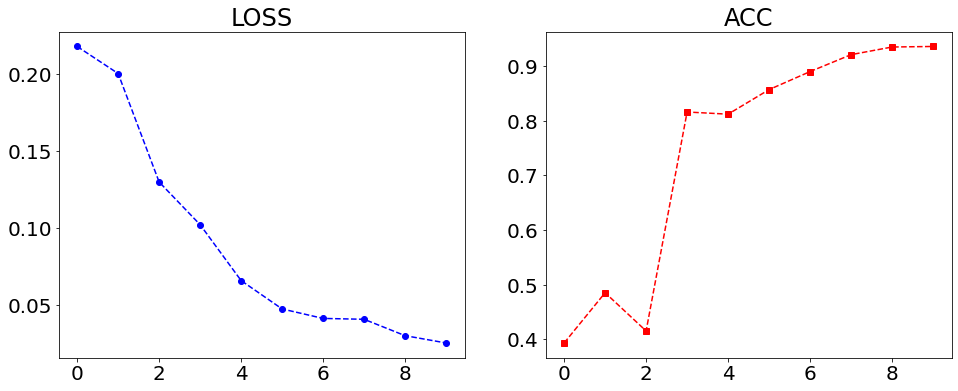

In [ ]:
# Visualize the loss function for each epoch
plt.rcParams["font.size"] = 20
fig=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('LOSS')
plt.plot(cnn1.log_loss,'bo--')

plt.subplot(1,2,2)
plt.title('ACC')
plt.plot(cnn1.log_acc,'rs--');

### Problem 8 - (Advanced Problem) LeNet

When performing image recognition with CNNs, it is common to use a well-known structure rather than thinking about filter size and number of layers from scratch. The most historically important one is LeNet from 1998, although it is no longer in practical use today. You can recreate this structure and run it against MNIST to calculate Accuracy.

In [ ]:
# LeNet structure
# Convolutional layers
LeNetCNN = {0:SimpleConv2d(F=6, C=1, FH=5, FW=5, P=2, S=1,
                           initializer=SimpleInitializerConv2d(),
                           optimizer=SGD(),
                           activation=ReLU()),
            1:MaxPool2D(P=2),
            2:SimpleConv2d(F=16, C=6, FH=5, FW=5, P=2, S=1,
                           initializer=SimpleInitializerConv2d(),
                           optimizer=SGD(),
                           activation=ReLU()),
            3:MaxPool2D(P=2),}

# Fully connected layers
LeNetNN = {0:FC(784, 120, HeInitializer(), AdaGrad(0.01), ReLU()),
           1:FC(120, 84, HeInitializer(), AdaGrad(0.01), ReLU()),
           2:FC(84, 10, SimpleInitializer(0.01), AdaGrad(0.01), Softmax()),}

# Learning
LeNet = Scratch2dCNNClassifier(NN=LeNetNN,CNN=LeNetCNN,
                               n_epoch=10,n_batch=20,verbose=False)

LeNet.fit(X_train[0:1000],y_train[0:1000])

In [ ]:
# Estimate
y_pred_LeNet = LeNet.predict(X_valid[0:1000])

# Positive solution rate
accuracy = accuracy_score(np.argmax(y_valid[0:1000],axis=1), y_pred_LeNet)
print('accuracy:{:.3f}'.format(accuracy))

accuracy:0.886


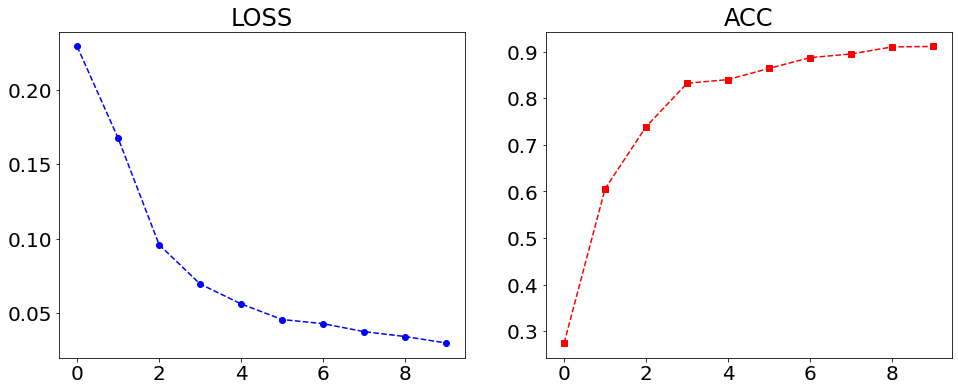

In [ ]:
# Visualize the loss function for each epoch
plt.rcParams["font.size"] = 20
fig=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('LOSS')
plt.plot(LeNet.log_loss,'bo--')

plt.subplot(1,2,2)
plt.title('ACC')
plt.plot(LeNet.log_acc,'rs--');

<center><img src="32.png" width='1000px'></center>

### Problem 9 - (Advanced Problem) Survey of well-known image recognition models

Some of the most popular CNN structures are AlexNet (2012), VGG16 (2014), and so on.  
Many of these models are already available in frameworks.

Please do some quick research and summarize what's available. It is a good idea to at least look at the names.

Famous CNN structures
* AlexNet(2012)
* ZFNet(2013)
* GoogleNet(2014)
* VGGNet(2014)
* ResNet(2015)
* SENet(2017)

### Problem 10 - Calculating output size and number of parameters
When building a CNN model, it is necessary to calculate the number of features in advance at the stage of inputting them into the all-connected layer.

Also, when dealing with huge models, the calculation of the number of parameters becomes essential due to memory and computation speed. The framework can display the number of parameters for each layer, but without understanding the meaning, it is impossible to make appropriate adjustments.

Calculate the output size and the number of parameters for the following three convolutional layers. For the number of parameters, also consider the bias term.

**1.**

* Input size : 144x144, 3 channels
* Filter size : 3×3, 6 channels
* Stride : 1
* Padding : None

→ Output size : 6×142×142, Number of parameters : 168 (Weight 162, Bias 6)

**2.**

* Input size : 60×60, 24 channels
* Filter size: 3×3, 48 channels
* Stride : 1
* Padding : None

→ Output size : 48×58×58, Number of parameters : 10416(Weight 10368, Bias 48)

**3.**

* Input size: 20x20, 10 channels
* Filter size: 3×3, 20 channels
* Stride : 2
* Padding : None

→ Output size: 20x9x9, Number of parameters: 1820 (weights 1800, bias 20)

The last example is a case where the convolution cannot be done just right. The framework sometimes does not look at the extra pixels, so please consider that case in your calculations. This is an example of why this kind of setting is not desirable, because it will result in missing edges.

### Problem 11 - (Advanced Problem) Survey on Filter Size
Convolutional layers have a hyperparameter called filter size, but in 2D convolutional layers the majority of use nowadays is 3×3 and 1×1. Please look up each of the following, or come up with your own explanation.

* Why 3×3 filters are commonly used instead of larger ones such as 7×7  
  → Because the number of parameters would be huge. (Size squared)  
    Because the purpose of convolution is to extract features (including positional relationships) between input parameters.
    Increasing the filter size is contrary to the purpose.
  
  
* The effect of a 1×1 filter with no height or width direction  
  → By reducing the number of output channels from the input channels, the number of parameters can be reduced.
  

* The effect of a 1×1 filter with no height or width direction.  
  → If the number is odd, the center of the filter is defined, but if the number is even, the center is not defined.